# Проект для сайта Repetit.ru

## Описание проекта
Сервис Repetit.ru работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%.
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

### Задача
Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом. Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет. Оценка качества модели будет производиться с использованием precision и ROC-AUC.


## Описание данных
***Заявки (orders*.feather)***
- order_date - дата создания
- subject_id - предмет
- purpose - цель занятий
- lesson_price - цена
- lesson_duration - желаемая проодолжительность урока
- home_metro_id - ближайшее метро
- add_info - доп инфо
- start_date
- working_teacher_id
- status_id - оплачена ли заявка
- comments   
- amount_to_pay
- planned_lesson_number - клиент планирует N занятий
- first_lesson_date - дата 1 занятия
- coef - коэффициент
- creator_id - кто создал заявку (id сотрудника или клиента)
- pupil_category_new_id - возраст ученика
- lessons_per_week - занятий а неделю
- minimal_price
- teacher_sex - пол репетитора
- teacher_experience_from - опыт репетитора от
- teacher_experience_to- опыт репетитора до
- lesson_place_new - онлайн, у ученика, у учителя
- pupil_knowledgelvl -уровень знаний ученика
- teacher_age_from - желаемый возраст репеитора от
- teacher_age_to - желаемый возраст репеитора от
- chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно
- no_teachers_available - на заявку нет подходящих репов
- source_id - где создана заявка (какая часть сайта, не регион)
- original_order_id - дублем какой заявки является эта заявка
- client_id - айди клиента
- additional_status_id
- max_metro_distance - максимально готов ехать от метро
- estimated_fee
- payment_date
- test_group - аб тесты
- is_display_to_teachers - хочет ли клиент получать отклики репетиторов
***Репетиторы (teacher_info.feather)***
- date_update
- reg_date
- birth_date
- teaching_start_date
- user_id - айди
- is_email_confirmed
- is_home_lessons
- is_external_lessons
- external_comments
- lesson_duration - продолжит урока
- lesson_cost - стоимость урока
- status_id
- status_relevant_date
- status_school_id
- status_college_id
- status_display
- russian_level_id
- home_country_id
- education
- information
- is_confirmed
- is_display - показывается в каталоге
- rating_id
- rating - рейтинг
- comments
- rules_confirmed_date
- last_visited - послеждний визит
- is_pupils_needed - открыт для заявок
- is_cell_phone_confirmed
- effective_rating - какой-то еще рейтинг
- area_id
- registrar_id
- pupil_needed_date
- sex
- amount_to_pay - долг
- is_remote_lessons
- remote_comments
- show_on_map
- send_mailing
- send_suitable_orders
- rating_for_users - рейтинг 2
- rating_for_admin - рейтинг 3
- passport_id
- is_edited
- orders_allowed - разрешено назначать на заявки
- display_days
- verification_status_id
- is_individual
- partner_id
- star_rating - рейтинг 4
- rating_for_users_yesterday - рейтинг вчера
- review_num - отзывы
- relevance_date
- is_display_at_partners
- video_presentation_id - есть видеопрезентация
- status_institution_id
- Free_time_relevance_date

***Подходящие по фильтру репетиторы (suitable_teachers.feather)***
- tteacher_id - id репетитора
- order_id - id заявки
- contact_result    
- enable_auto_assign
- enable_assign




## Загрузка и обработка данных

Перед началом работы устанавливаем все необходимые нам расширения и загружаем библиотеки, которые будем использовать в работе

In [1]:
!pip install -q pyarrow
!pip install -q lightgbm
!pip install -q optuna
!pip install -q catboost
!pip install -q pandas_profiling
!pip install -q pydantic==1.8.2
!pip install -q sweetviz
!pip install -q fuzzywuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into

In [2]:
from google.colab import drive
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np
from category_encoders import OrdinalEncoder
import pyarrow.feather as feather
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sweetviz as sv
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from fuzzywuzzy import process, fuzz
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
<ipython-input-2-c5c467d7db65>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling`

In [3]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


Сохраняем имеющиеся у нас данные в отдельных переменных. Просматриваем корректно ли они выгрузились.

In [4]:
orders = pd.read_feather("orders.feather")
suitable_teachers = pd.read_feather("suitable_teachers.feather")
teachers_info = pd.read_feather("teachers_info.feather")

In [7]:
display(orders)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,...,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.0,None,0,60,None,NaN,None,None,...,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.0,Разделы: начертательная геометрия.\nКатегория ...,800,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,...,0,0,23,NaN,1024439,10.0,NaN,1200,None,1
3,2294057,2022-11-01 00:08:47.237,8.0,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,...,0,0,14,2293804.0,1024340,17.0,NaN,2310,None,1
4,2294058,2022-11-01 00:11:49.417,8.0,None,0,60,None,122.0,None,None,...,0,0,16,NaN,1024440,5.0,NaN,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437212,2280503,2022-10-24 19:45:30.277,9.0,Разделы: школьный курс.\nКатегория ученика: ...,1000,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-10-24 20:17:29.977,...,0,0,23,NaN,824363,NaN,NaN,2650,2022-11-18 00:06:48.273,1
437213,2280504,2022-10-24 19:45:40.713,1.0,Разделы: школьный курс.\nКатегория ученика: ш...,1000,120,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-10-24 20:07:25.370,...,0,0,14,2280289.0,362987,13.0,NaN,2700,None,1
437214,2280505,2022-10-24 19:45:44.477,2.0,Разделы: общий курс.\nКатегория ученика: 1 кла...,600,60,None,489.0,Район: Ленинский район.\nМесто проведения заня...,2022-10-24 20:45:51.357,...,1,0,23,NaN,1019633,17.0,NaN,900,None,1
437215,2280506,2022-10-24 19:46:02.453,18.0,Разделы: математика.\nКатегория ученика: школь...,900,60,None,487.0,Район: Автозаводский район.\nМесто проведения ...,None,...,0,1,14,2200131.0,791697,8.0,NaN,2565,None,1


Изучаем информацию нашего первого датасета - датасетами с информацией об оформленных заявках учеников.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id      4 non-null        

Мы видим, что в некоторых столбцах практически отсутствуют даннные, в некоторых столбцах имеются пропуски, а также, что у некоторых переменных неверно указан тип данных. Постепенно исправим эти недочеты, но пока проверим таблицу на наличие полных дубликатов

In [9]:
orders.duplicated().sum()

900

В наших данных оказалось 900 полных дубликатов. Удаляем их.

In [10]:
orders = orders.drop_duplicates()

У нас есть параметр с написанными вручную комментариями.Попробуем вынуть из текста этап обучения заявителя: в каком классе он находится, на каком курсе и пр. Возможно, в будущем этот новый параметр поможет нашей модели в обучении.

In [11]:
orders['purpose'].unique()

array([None,
       'Разделы: начертательная геометрия.\nКатегория ученика: студентка 1 курса.\nЦель занятий: помощь по программе.',
       'Разделы:  школьный курс.\nКатегория ученика: школьник 9 класса.\nЦель занятий: помощь по школьной программе.',
       ...,
       'Разделы: алгебра.\nДополнения: ОГЭ .\nКатегория ученика: школьник 9 класса.\nЦель занятий: сдать ОГЭ, подтянуть с 7 класса до 9',
       'Разделы:  школьный курс.\nКатегория ученика:  два школьника 7 класса.\nЦель занятий: занятия по школьной программе.',
       'Разделы: общий курс.\nКатегория ученика: 1 класс.\nУровень знаний: с нуля.\nОЧНЫЕ ЗАНЯТИЯ.'],
      dtype=object)

In [12]:
orders['learning_stage'] = orders['purpose'].str.extract(r'Категория ученика: (.*)', expand=False)

<ipython-input-12-57aad466764d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['learning_stage'] = orders['purpose'].str.extract(r'Категория ученика: (.*)', expand=False)


In [13]:
orders['learning_stage'].value_counts()

школьник 9 класса.                                                                         75609
школьник 11 класса.                                                                        62178
9 класс.                                                                                   55768
11 класс.                                                                                  44344
школьник 10 класса.                                                                        40546
                                                                                           ...  
группы до 8 человек, дети от 4 до 13 лет.                                                      1
школьник 3 класса. Подготовка к ВПР, сопровождение школьного курса, не тянет математику        1
9 класс. Говорит простые слова.                                                                1
студент 1 курса медицинского колледжа (фармакология)                                           1
девушка, 25 лет. Низкий уровен

In [14]:
def get_best_match(query, choices):
    if isinstance(query, str):
        return process.extractOne(query, choices, scorer=fuzz.partial_ratio)[0]
    else:
        return query

replacement_options = ['Дошкольник', 'Взрослый','Первый класс', '2 класс', '3 класс', '4 класс', '5 класс', '6 класс', '7 класс', '8 класс', '9 класс', '10 класс',\
                        '11 класс','1 курс', '2 курс', '3 курс', '4 курс', '5 курс','6 курс','7 курс', '8 курс' ]

orders['learning_stage'] = orders['learning_stage'].apply(get_best_match, choices=replacement_options)



<ipython-input-14-a4ea0be023d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['learning_stage'] = orders['learning_stage'].apply(get_best_match, choices=replacement_options)


In [15]:
orders['learning_stage'].value_counts()

9 класс         164460
11 класс        137680
10 класс         99375
Взрослый         95704
8 класс          82669
7 класс          74668
6 класс          64667
5 класс          53145
2 класс          43432
4 класс          42508
3 класс          36963
1 курс           34851
Дошкольник       19615
Первый класс     14499
2 курс           10309
3 курс            5087
4 курс            3374
5 курс             840
6 курс             258
8 курс             113
7 курс              80
Name: learning_stage, dtype: int64

Нам удалось разбить заявителей на отдельные категории. Также у нас имеется стобец с датой подачи заявки. Во-первых, тип данных в столбце указан неверно, исправляем это.Во-вторых, у нас нет необходимости полной даты, вытацим из нее признаки, которые могут помочь нашей модели при обучении и удалим изначальный столбец. Новыми признаками будут месяц подачи заявки и день недели, в который была подана заявка

In [16]:
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')

<ipython-input-16-5668c5cce964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')


In [17]:
orders[orders['order_date'].isna()]

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,...,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers,learning_stage
105390,3211265,NaT,3211265.0,None,3211265,3211265,None,3211265.0,None,0042-01-12 05:09:05.007,...,1,3211265,3211265.0,3211265,3211265.0,3211265.0,"8,344264636103745E-308",0042-01-12 05:09:05.007,1,None
109392,3342337,NaT,3342337.0,None,3342337,3342337,None,3342337.0,None,0042-01-12 04:26:08.039,...,1,3342337,3342337.0,3342337,3342337.0,3342337.0,"8,344239172283769E-308",0042-01-12 04:26:08.039,1,None
437216,3605505,NaT,3605505.0,None,3605505,3605505,None,3605505.0,None,0029-07-18 05:28:02.684,...,1,3605505,3605505.0,3605505,3605505.0,3605505.0,"4,450342944189884E-308",0029-07-18 05:28:02.684,1,None


In [18]:
orders = orders.dropna(subset=['order_date'])

In [19]:
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
orders['order_date'] = orders['order_date'].dt.strftime('%Y-%m-%d')
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [20]:
orders['order_month'] = orders['order_date'].dt.month

In [21]:
orders['order_wd'] = orders['order_date'].dt.day_of_week

У нас имеется еще один столбец с комментариями. Найти какие-то общие черты в комментариях мы вряд ли сможем, поэтому создадим новый параметр, где будет указано, была ли дополнительная информация в заявке (1) или нет (0)

In [22]:
orders['add_info_is'] = orders['add_info'].notna().astype(int)

Удаляем из данных столбцы с параметрами, которые не несут для нас никакой ценной информации и которые не известны в момент подачи заявки и формируются позже, по мере ее редактирования

In [23]:
orders = orders.drop( columns=['order_date','add_info','start_date','comments','amount_to_pay','first_lesson_date','additional_status_id',\
                               'estimated_fee','payment_date','lesson_place','prefered_teacher_id','purpose','working_teacher_id'])

In [24]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 437215
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1180633 non-null  float32
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration          1190958 non-null  int32  
 4   home_metro_id            642006 non-null   float32
 5   status_id                1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   creator_id               579325 non-null   float32
 8   pupil_category_new_id    1031652 non-null  float32
 9   lessons_per_week         1190958 non-null  int32  
 10  minimal_price            1190958 non-null  int32  
 11  teacher_sex              1190958 non-null  int32  
 12  teacher_experience_from  1190958 non-null  int32  
 13  teacher_experience_to    1190958 non-null  

None

Заполняем пропуски в столбце  с id создателя заявки 0. Далее на основании этих данных создаем новый параметр, в котором будет отражено создал ли заявку оператор (если creator_id не равен 0) или же пользователь.

In [26]:
orders['creator_id'] = orders['creator_id'].fillna(0)

In [27]:
orders['order_maker'] = [0 if creat == 0 else 1 for creat in orders['creator_id']]

In [29]:
orders = orders.drop( columns=['creator_id'])

Заполним пропуски в столбце с id предмета, по которому человек хочет подтянуть или получить знания, посредством метода ближайших соседей

In [33]:
orders[['subject_id']] = KNNImputer(n_neighbors=5).fit_transform(orders[['subject_id']])

В столбце pupil_category_new_id  уникальные значения варьируются от 1 до 18, но пропущено значение 13. Предположим, что пропущенные значения это и есть та самая 13 категория. Заполним пропуски этим значением.

In [34]:
orders['pupil_category_new_id'] = orders['pupil_category_new_id'].fillna(13)

Смотрим, в каких данных у нас еще имеются пропуски

In [35]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 437215
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1190958 non-null  float32
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration          1190958 non-null  int32  
 4   home_metro_id            642006 non-null   float32
 5   status_id                1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   pupil_category_new_id    1190958 non-null  float32
 8   lessons_per_week         1190958 non-null  int32  
 9   minimal_price            1190958 non-null  int32  
 10  teacher_sex              1190958 non-null  int32  
 11  teacher_experience_from  1190958 non-null  int32  
 12  teacher_experience_to    1190958 non-null  int32  
 13  lesson_place_new         1190958 non-null  

In [36]:
orders[orders['home_metro_id'].isna()]['lesson_place_new'].value_counts()

4    413198
0    118159
1      6746
2      5164
3      2440
6      1590
5       966
7       689
Name: lesson_place_new, dtype: int64

Мы провели проверку значений места проведения уроков, при которых отсутствуют значения в индексе ближайшего метро ученика. Можно предположить, что там, где айди метро не указан больше всего то это онлайн-занятия и ученики просто не видят смысла указывать свое ближайшее метро. Поэтому заменим пропуски 0. По этой же логике заполняем 0 пропуски в максимальном расстоянии до метро.

In [37]:
orders['home_metro_id'] = orders['home_metro_id'].fillna(0)

In [40]:
orders[(orders['max_metro_distance'].isna()) & (orders['lesson_place_new'] == 4)]['max_metro_distance'] = 0

<ipython-input-40-98b2136b812b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders[(orders['max_metro_distance'].isna()) & (orders['lesson_place_new'] == 4)]['max_metro_distance'] = 0


Остальные же пропуски заполним средним значением

In [41]:
orders['max_metro_distance'] = orders['max_metro_distance'].fillna(orders['max_metro_distance'].mean())

Таким же значением (0) заполним пропуски в столбце с указанием изначального ацди заявки. Если этого значения нет, значит заявка оставляется впервые

In [38]:
orders['original_order_id'] = orders['original_order_id'].fillna(0)

In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 437215
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1190958 non-null  float32
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration          1190958 non-null  int32  
 4   home_metro_id            1190958 non-null  float32
 5   status_id                1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   pupil_category_new_id    1190958 non-null  float32
 8   lessons_per_week         1190958 non-null  int32  
 9   minimal_price            1190958 non-null  int32  
 10  teacher_sex              1190958 non-null  int32  
 11  teacher_experience_from  1190958 non-null  int32  
 12  teacher_experience_to    1190958 non-null  int32  
 13  lesson_place_new         1190958 non-null  

Хоть мы и смогли вынески в отдельную переменную этап обучения ученика, в некоторрых заявках остались пропуски. Попробуем заполнить их модой этого столбца

In [43]:
orders['learning_stage'] = orders['learning_stage'].fillna(orders['learning_stage'].mode().iloc[0])

Пропуски заполнены, осталось привести отдельные параметры к верному типу данных.

In [45]:
orders = orders.astype({'home_metro_id': 'int', 'pupil_category_new_id': 'int', 'original_order_id': 'int', 'subject_id' : 'int'})

In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 437215
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1190958 non-null  int64  
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration          1190958 non-null  int32  
 4   home_metro_id            1190958 non-null  int64  
 5   status_id                1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   pupil_category_new_id    1190958 non-null  int64  
 8   lessons_per_week         1190958 non-null  int32  
 9   minimal_price            1190958 non-null  int32  
 10  teacher_sex              1190958 non-null  int32  
 11  teacher_experience_from  1190958 non-null  int32  
 12  teacher_experience_to    1190958 non-null  int32  
 13  lesson_place_new         1190958 non-null  

Закодируем столбец с данными об этапе обучения заявителя, чтобы сделать все данные в таблице в числовом формате.

In [48]:
encoder = OrdinalEncoder()
orders['learning_stage'] = encoder.fit_transform(orders[['learning_stage']])

Теперь изучим вторые две таблицы, в которых указаны подходящие по фильру репетиторы и, соответственно, информация о каждом из этих репетиторов

In [49]:
suitable_teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271186 entries, 0 to 20271185
Data columns (total 5 columns):
 #   Column              Dtype   
---  ------              -----   
 0   teacher_id          int32   
 1   order_id            int32   
 2   contact_result      category
 3   enable_auto_assign  int8    
 4   enable_assign       int8    
dtypes: category(1), int32(2), int8(2)
memory usage: 232.3 MB


In [50]:
teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972 non-null  int8    
 13 

Нам нудны только те данные, которые сразу известны при формировании заявки учеником. Поэтому оставляем в таблице с информацией о репетиторах только параметры с такими данными

In [51]:
columns_to_select = ['id','is_home_lessons','is_external_lessons','lesson_duration','lesson_cost','status_id',
                      'status_display','home_country_id','is_display','rating',
                      'area_id','sex','is_remote_lessons','orders_allowed','verification_status_id']

teachers_info = teachers_info[columns_to_select]

In [52]:
teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   id                      307972 non-null  int32
 1   is_home_lessons         307972 non-null  int8 
 2   is_external_lessons     307972 non-null  int8 
 3   lesson_duration         307972 non-null  int16
 4   lesson_cost             307972 non-null  int32
 5   status_id               307972 non-null  int8 
 6   status_display          307972 non-null  int8 
 7   home_country_id         307972 non-null  int16
 8   is_display              307972 non-null  int8 
 9   rating                  307972 non-null  int32
 10  area_id                 307972 non-null  int8 
 11  sex                     307972 non-null  int8 
 12  is_remote_lessons       307972 non-null  int8 
 13  orders_allowed          307972 non-null  int8 
 14  verification_status_id  307972 non-null  int8 
dtype

Аналогично делает и в другой таблице

In [54]:
suitable_teachers = suitable_teachers.drop(columns='contact_result')

Объединяем таблицы по персональным кодам учителей

In [55]:
merged_data = pd.merge(suitable_teachers, teachers_info, how='inner', left_on='teacher_id', right_on='id')

In [56]:
merged_data

,teacher_id,order_id,enable_auto_assign,enable_assign,id,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,status_id,status_display,home_country_id,is_display,rating,area_id,sex,is_remote_lessons,orders_allowed,verification_status_id
0,82583,1742711,1,1,82583,1,0,45,600,3,0,7,1,5,12,1,0,1,0
1,82583,2303834,0,0,82583,1,0,45,600,3,0,7,1,5,12,1,0,1,0
2,82583,2341690,0,0,82583,1,0,45,600,3,0,7,1,5,12,1,0,1,0
3,82583,2357656,0,0,82583,1,0,45,600,3,0,7,1,5,12,1,0,1,0
4,82583,2358339,0,0,82583,1,0,45,600,3,0,7,1,5,12,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271179,95314,2946238,0,0,95314,1,1,60,800,5,0,7,1,6,1,2,1,0,0
20271180,159221,2944984,0,0,159221,0,1,60,0,1,0,7,1,5,1,1,0,0,0
20271181,310324,2946405,0,0,310324,1,1,60,1500,5,0,7,1,5,2,1,1,1,0
20271182,155040,2946351,0,0,155040,1,0,60,600,5,1,7,1,7,4,2,1,0,3


Удаляем столбцы, которые в будущем нам не понадобятся

In [57]:
merged_data = merged_data.drop( columns = ['id','enable_auto_assign'])

Для дальнейшего объединения данной таблицы с таблицой с заказами, нам необходимо произвести группировку по персональному индетификатору учителей. Чтобы у нас имелось как можно больше нужной информации, которая сможет помочь нашей модели в обучении, при группировке подсчитываем кол-во учителей, принимающих на дома, выезжающих к ученикам и проводяящие уроки в режиме он-лайн,сколько из них открыты к назначению на заявку,какая их средняя цена за урок и какой средний рейтинг

In [58]:
agg_functions = {
    'teacher_id': 'nunique',
    'is_home_lessons': lambda x: x.value_counts().index[0],
    'lesson_duration': lambda x: x.value_counts().index[0],
    'status_id': lambda x: x.value_counts().index[0],
    'sex': lambda x: x.value_counts().index[0],
    'enable_assign': 'sum',
    'is_home_lessons': 'sum',
    'is_external_lessons': 'sum',
    'is_remote_lessons': 'sum',
    'lesson_cost': 'mean',
    'rating': 'mean'
}


grouped_data = merged_data.groupby('order_id').agg(agg_functions).reset_index()

In [59]:
grouped_data

,order_id,teacher_id,is_home_lessons,lesson_duration,status_id,sex,enable_assign,is_external_lessons,is_remote_lessons,lesson_cost,rating
0,1742638,13,6,60,5,1,0,11,11,776.923077,5.692308
1,1742639,1,0,60,7,2,1,1,1,1000.000000,6.000000
2,1742650,3,2,60,5,2,1,3,3,133.333333,5.666667
3,1742651,3,0,60,1,2,0,2,1,1533.333333,6.000000
4,1742654,4,4,60,3,2,0,3,4,775.000000,2.750000
...,...,...,...,...,...,...,...,...,...,...,...
842014,2946695,3,3,90,5,2,0,0,3,900.000000,6.000000
842015,2946696,57,29,60,5,2,0,25,57,621.929825,5.456140
842016,2946697,10,2,60,1,2,0,10,8,160.000000,5.600000
842017,2946698,2,2,60,5,1,0,2,2,350.000000,7.000000


Округляем полученные значения до двух знаков после запятой

In [60]:
float_param = ['lesson_cost','rating']
grouped_data[float_param] = grouped_data[float_param].round(2)

Теперь объединяем нашу сгруппироаную таблицу и таблицу с заявками

In [61]:
merged_data = pd.merge(orders, grouped_data, left_on='id', right_on='order_id', how = 'left')

In [62]:
merged_data

,id,subject_id,lesson_price,lesson_duration_x,home_metro_id,status_id_x,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,...,teacher_id,is_home_lessons,lesson_duration_y,status_id_y,sex,enable_assign,is_external_lessons,is_remote_lessons,lesson_cost,rating
0,2294054,1,0,60,4,16,0,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2294055,1,0,60,4,7,0,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2294056,21,800,60,4,16,7,14,2,0,...,5.0,5.0,60.0,5.0,2.0,1.0,3.0,5.0,574.00,6.40
3,2294057,8,700,60,4,16,10,10,3,0,...,3.0,2.0,60.0,3.0,2.0,0.0,1.0,3.0,700.00,6.67
4,2294058,8,0,60,122,16,0,13,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190953,2280502,13,900,60,792,16,10,10,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190954,2280503,9,1000,60,4,6,10,8,2,800,...,18.0,10.0,60.0,3.0,2.0,0.0,9.0,18.0,711.11,4.39
1190955,2280504,1,1000,120,4,16,10,6,2,0,...,28.0,14.0,60.0,5.0,2.0,0.0,21.0,28.0,458.93,5.00
1190956,2280505,2,600,60,489,16,10,2,3,500,...,7.0,7.0,60.0,5.0,2.0,0.0,4.0,5.0,264.29,5.00


Проверяем все ли хорошо с данными в нашей новой таблице

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 1190957
Data columns (total 40 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1190958 non-null  int64  
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration_x        1190958 non-null  int32  
 4   home_metro_id            1190958 non-null  int64  
 5   status_id_x              1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   pupil_category_new_id    1190958 non-null  int64  
 8   lessons_per_week         1190958 non-null  int32  
 9   minimal_price            1190958 non-null  int32  
 10  teacher_sex              1190958 non-null  int32  
 11  teacher_experience_from  1190958 non-null  int32  
 12  teacher_experience_to    1190958 non-null  int32  
 13  lesson_place_new         1190958 non-null 

Для начала удалим параметры, которые нам уже не нужны и которые могут привести к утечке во время обучения модели.

In [64]:
merged_data = merged_data.drop(columns =['order_id', 'teacher_id'])

Так как мы обьединяли таблицы, образовалось много пропусков в столбцах с информацией об учителях. Не у каждой заявки имеются такие данные, так что просто заполним эти пропуски 0. Параметры с целочисленными значениями приведем к целочисленному типу данных

In [67]:
merged_data = merged_data.fillna(0)

In [69]:
int_param = ['is_home_lessons','status_id_y','sex','enable_assign','is_external_lessons','is_remote_lessons','rating','lesson_duration_y']
merged_data[int_param] = merged_data[int_param].astype('int')

Создадим столбец со значение, которое м ы будем предсказывать, а точнее, будет оплачена заявка или нет. Если значения в столбце со статусом заявки равняются 5,6,13,14 или 15 то ставим что заявка оплачена (1) в противном случае проставляем 0.

In [70]:
merged_data['target'] = merged_data['status_id_x'].apply(lambda x: 1 if x in [5,6,13,15,14] else 0)

В нашей таблице имеются дубликаты начальных заявок, которые могут отличаться по статусу заявки.Сгруппируем данные по указанным оригинальным идентификаторам. Если хотя бы одна из заявок оплачена (1), то скорректируем нашу основную таблицу так, чтобы все остальные заявки (дубли и оригинальная заявка) имели статус оплачено(1)

In [71]:
grouped_data = merged_data.groupby('original_order_id').agg({'target': 'max'}).reset_index()

In [72]:
grouped_data

,original_order_id,target
0,0,1
1,263,1
2,19367,0
3,113952,0
4,134851,0
...,...,...
314924,2936679,0
314925,2936924,0
314926,2937195,0
314927,2937205,0


In [73]:
merged_data['target'] = merged_data['id'].map(grouped_data.set_index('original_order_id')['target']).combine_first(merged_data['target']).astype(int)

In [74]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190958 entries, 0 to 1190957
Data columns (total 39 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1190958 non-null  int32  
 1   subject_id               1190958 non-null  int64  
 2   lesson_price             1190958 non-null  int32  
 3   lesson_duration_x        1190958 non-null  int32  
 4   home_metro_id            1190958 non-null  int64  
 5   status_id_x              1190958 non-null  int32  
 6   planned_lesson_number    1190958 non-null  int32  
 7   pupil_category_new_id    1190958 non-null  int64  
 8   lessons_per_week         1190958 non-null  int32  
 9   minimal_price            1190958 non-null  int32  
 10  teacher_sex              1190958 non-null  int32  
 11  teacher_experience_from  1190958 non-null  int32  
 12  teacher_experience_to    1190958 non-null  int32  
 13  lesson_place_new         1190958 non-null 

Сохраним наш предобработанный датасет в новую переменную для удобства и удалим столбцы, которые уже не несут для нас ценности.

In [75]:
data = merged_data.drop(columns = ['id','client_id'])

## Анализ данных

Проведем анализ наших данных, чтобы убрать некорректные значения или заменить их. Для этого используем библиотеку, которая составит нам отчет об имеющихся в таблице данных.

In [76]:
pandas_profiling.ProfileReport(data)

TypeCheckError: argument "config_file" (None) did not match any element in the union:
  pathlib.Path: is not an instance of pathlib.Path
  str: is not an instance of str

Первое, что мне хотелось бы сделать после изучения отчета, так это избавиться от высокой корреляции между некоторыми параметрами. Поэтому удалим несколько столбцов, которые имеют достаточно высокую корреляцию с 5-8 другими столбцами

In [77]:
data = data.drop(columns = ['add_info_is','is_remote_lessons','is_home_lessons','is_external_lessons','lesson_duration_y'])

Мы можем заметить выбивающиеся из общей массы значения стоимости уроков. Изучив данные, посмотрим сколько заявок имеют стоимость уроков более 2500

In [78]:
data[data['lesson_price'] > 2500]['lesson_price'] .count()

43718

Цифра не такая большая, тем не менее, заменим средним значением все значения стоимости урока превышающего 2500р и меньше 500р.

In [79]:
data.loc[data['lesson_price'] > 2500, 'lesson_price'] = data['lesson_price'].mean()
data.loc[(data['lesson_price'] < 500) & (data['lesson_price'] > 0), 'lesson_price'] = data['lesson_price'].mean()

Аналогичная ситуация и с минимальной ценой урока, мы снова видим неадекватные значения. Заменим их самыми популярными значениями в своих ценовых диаппазонах

In [80]:
data.loc[data['minimal_price'] > 5000, 'minimal_price'] = 2000
data.loc[(data['minimal_price'] < 500) & (data['minimal_price'] > 0), 'minimal_price'] = 1000

Изучив данные, мы видим, что опыт преподавателя в основном не более 70 лет, поэтому заменяем все значения выше этой цифры на нее же

In [81]:
data.loc[data['teacher_experience_to'] > 70, 'teacher_experience_to'] = 70

Тут в данных мы обнаруживаем отрицательные значения, чего быть не должно. Может опечатка, может сбой при выгрузке, может при группировке или объединении. Убираем минусы и заполняем неадекватне значения возраста учителя рандомными значениями в пределах нормы.

In [82]:
data['teacher_age_from'] = data['teacher_age_from'].abs()
data.loc[data['teacher_age_from'] > 50, 'teacher_age_from'] = np.random.randint(18, 36, size=sum(data['teacher_age_from'] > 50))
data.loc[(data['teacher_age_from'] < 18) & (data['teacher_age_from'] > 0), 'teacher_age_from'] = np.random.randint(18, 36,\
     size=sum((data['teacher_age_from'] < 18) & (data['teacher_age_from'] > 0)))

Аналогично делаем и с верхним порогом возраста преподавателя. Далее по такой же логике заменяем неадекватные значения в столбцах с максимальной удаленностью от метро, стоимостью уроков и рейтингом учителей

In [83]:
data['teacher_age_to'] = data['teacher_age_to'].abs()
data.loc[data['teacher_age_to'] > 90, 'teacher_age_to'] = np.random.randint(25, 91, size=sum(data['teacher_age_to'] > 90))
data.loc[(data['teacher_age_to'] < 25) & (data['teacher_age_to'] > 0), 'teacher_age_to'] = np.random.randint(25, 91,\
     size=sum((data['teacher_age_to'] < 25) & (data['teacher_age_to'] > 0)))

In [84]:
data.loc[data['max_metro_distance'] > 120, 'max_metro_distance'] = np.random.randint(5, 121, size=sum(data['max_metro_distance'] > 120))
data.loc[(data['max_metro_distance'] < 5) & (data['max_metro_distance'] > 0), 'max_metro_distance'] = np.random.randint(5, 51,\
     size=sum((data['max_metro_distance'] < 5) & (data['max_metro_distance'] > 0)))

In [85]:
data.loc[data['lesson_cost'] > 6000, 'lesson_cost'] = np.random.randint(1500, 6001, size=sum(data['lesson_cost'] > 6000))
data.loc[(data['lesson_cost'] < 300) & (data['lesson_cost'] > 0), 'lesson_cost'] = np.random.randint(300, 1501,\
     size=sum((data['lesson_cost'] < 300) & (data['lesson_cost'] > 0)))

In [86]:
data.loc[data['rating'] < 0, 'rating'] = np.random.randint(1, 6, size=sum(data['rating'] < 0))

Так как в наших данных присутствуют заявки-дубли, это может помешать нашей модели корректно обучиться, поэтому выделим в отдельные переменные начальные заявки и заявки-дубли. Удаляем столбцы со статусами и индетефикаторами, которые больше нам не понадобятся.

In [89]:
data_duplicates = data[data['original_order_id'] != 0]
data_orig = data[data['original_order_id'] == 0]

In [90]:
data_orig = data_orig.drop(columns = ['original_order_id'])
data_duplicates = data_duplicates.drop(columns = ['original_order_id'])

In [91]:
data_target = data_orig['target']
data_features = data_orig.drop(columns = ['target','status_id_x'])

## Обучение моделей

Перед тем как начать обучать модель или разделить данные на выборки, стандартизируем данные, которые есть в нашей таблице.

In [92]:
scaler = StandardScaler()
data_features = scaler.fit_transform(data_features)
data_features = pd.DataFrame(data_features, columns=data_orig.drop(columns =['target','status_id_x']).columns)

Делим данные на тренировочную и тестовую выборки 80/20

In [93]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=2345)

Для наилучшего подбора параметров будем использовать Optuna. А первой моделью у нас будет модель Случайного леса.

In [95]:
def objective(trial):
        params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    if params['max_features'] == 'auto':
        params['max_features'] = trial.suggest_uniform('max_features_auto', 0.1, 1.0)

    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print('ROC-AUC: {:.4f}'.format(trial.value))
print('Params: {}'.format(trial.params))


[I 2024-02-19 10:46:54,550] A new study created in memory with name: no-name-10a5221b-0921-4d20-9478-878d426740f7
[I 2024-02-19 10:48:05,255] Trial 0 finished with value: 0.6780429934185594 and parameters: {'n_estimators': 411, 'max_depth': 10, 'min_samples_split': 0.4573827728956701, 'min_samples_leaf': 0.18556064708916745, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6780429934185594.
[I 2024-02-19 10:48:15,628] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 159, 'max_depth': 12, 'min_samples_split': 0.4945318858206311, 'min_samples_leaf': 0.3393327684611196, 'max_features': 'auto', 'max_features_auto': 0.7327580782266591}. Best is trial 0 with value: 0.6780429934185594.
[I 2024-02-19 10:48:51,981] Trial 2 finished with value: 0.6883480209129654 and parameters: {'n_estimators': 286, 'max_depth': 11, 'min_samples_split': 0.5538526598977126, 'min_samples_leaf': 0.10553896892932656, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.6883480209129654.
[I 

Best trial:
ROC-AUC: 0.7225
Params: {'n_estimators': 274, 'max_depth': 11, 'min_samples_split': 0.15938684083285326, 'min_samples_leaf': 0.10080451199733573, 'max_features': 'auto', 'max_features_auto': 0.1430340721747287}


Лучший показатель метрики roc-auc = 0.7225 смогла получить путем подбора параметров, указанных выше. Результат неплохой, но теперь бучим модель LightGBM и посмотрим какие результаты даст она.

In [97]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print('ROC-AUC: {:.4f}'.format(trial.value))
print('Params: {}'.format(trial.params))

[I 2024-02-19 12:20:16,499] A new study created in memory with name: no-name-30858a68-b39a-43d2-bfff-ec9e7790c6c1


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6486529460597483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6486529460597483
[LightGBM] [Warning] bagging_fraction is set=0.5051146257634995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5051146257634995
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6486529460597483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6486529460597483
[LightGBM] [Warning] bagging_fraction is set=0.5051146257634995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5051146257634995
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.889893 seconds.
You ca

[I 2024-02-19 12:20:42,599] Trial 0 finished with value: 0.7625176081630838 and parameters: {'num_leaves': 17, 'learning_rate': 0.04878165675726748, 'feature_fraction': 0.6486529460597483, 'bagging_fraction': 0.5051146257634995, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 0 with value: 0.7625176081630838.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6126358520963122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6126358520963122
[LightGBM] [Warning] bagging_fraction is set=0.6600463030471297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6600463030471297
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6126358520963122, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6126358520963122
[LightGBM] [Warning] bagging_fraction is set=0.6600463030471297, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6600463030471297
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.356754 seconds.
You ca

[I 2024-02-19 12:21:03,488] Trial 1 finished with value: 0.7615309393221992 and parameters: {'num_leaves': 56, 'learning_rate': 0.014206632813997064, 'feature_fraction': 0.6126358520963122, 'bagging_fraction': 0.6600463030471297, 'bagging_freq': 4, 'min_child_samples': 96}. Best is trial 0 with value: 0.7625176081630838.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.34487270981198825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34487270981198825
[LightGBM] [Warning] bagging_fraction is set=0.699107143856011, subsample=1.0 will be ignored. Current value: bagging_fraction=0.699107143856011
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.34487270981198825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34487270981198825
[LightGBM] [Warning] bagging_fraction is set=0.699107143856011, subsample=1.0 will be ignored. Current value: bagging_fraction=0.699107143856011
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.274291 seconds.
You ca

[I 2024-02-19 12:21:15,104] Trial 2 finished with value: 0.7679253064445098 and parameters: {'num_leaves': 23, 'learning_rate': 0.09132380809934625, 'feature_fraction': 0.34487270981198825, 'bagging_fraction': 0.699107143856011, 'bagging_freq': 5, 'min_child_samples': 70}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.42264717950232855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42264717950232855
[LightGBM] [Warning] bagging_fraction is set=0.5902854875307542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5902854875307542
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.42264717950232855, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42264717950232855
[LightGBM] [Warning] bagging_fraction is set=0.5902854875307542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5902854875307542
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.288273 seconds.
Yo

[I 2024-02-19 12:21:30,157] Trial 3 finished with value: 0.7608797938720501 and parameters: {'num_leaves': 71, 'learning_rate': 0.011928497834488832, 'feature_fraction': 0.42264717950232855, 'bagging_fraction': 0.5902854875307542, 'bagging_freq': 6, 'min_child_samples': 65}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8338940259275035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8338940259275035
[LightGBM] [Warning] bagging_fraction is set=0.2930791494929552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2930791494929552
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8338940259275035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8338940259275035
[LightGBM] [Warning] bagging_fraction is set=0.2930791494929552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2930791494929552
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.218604 seconds.
You ca

[I 2024-02-19 12:21:47,909] Trial 4 finished with value: 0.7594329367778452 and parameters: {'num_leaves': 77, 'learning_rate': 0.004530950121816561, 'feature_fraction': 0.8338940259275035, 'bagging_fraction': 0.2930791494929552, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8137354668435427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8137354668435427
[LightGBM] [Warning] bagging_fraction is set=0.8589232657366423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589232657366423
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8137354668435427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8137354668435427
[LightGBM] [Warning] bagging_fraction is set=0.8589232657366423, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8589232657366423
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083980 seconds.
You ca

[I 2024-02-19 12:22:04,504] Trial 5 finished with value: 0.7609198646357774 and parameters: {'num_leaves': 18, 'learning_rate': 0.036831023917519294, 'feature_fraction': 0.8137354668435427, 'bagging_fraction': 0.8589232657366423, 'bagging_freq': 7, 'min_child_samples': 11}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.5637935107558468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5637935107558468
[LightGBM] [Warning] bagging_fraction is set=0.782361047114994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.782361047114994
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.5637935107558468, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5637935107558468
[LightGBM] [Warning] bagging_fraction is set=0.782361047114994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.782361047114994
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212724 seconds.
You can se

[I 2024-02-19 12:22:23,143] Trial 6 finished with value: 0.7667799362737381 and parameters: {'num_leaves': 53, 'learning_rate': 0.03881953709193545, 'feature_fraction': 0.5637935107558468, 'bagging_fraction': 0.782361047114994, 'bagging_freq': 8, 'min_child_samples': 45}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5171500528180094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5171500528180094
[LightGBM] [Warning] bagging_fraction is set=0.8345049465327176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8345049465327176
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5171500528180094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5171500528180094
[LightGBM] [Warning] bagging_fraction is set=0.8345049465327176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8345049465327176
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.359492 seconds.
You ca

[I 2024-02-19 12:22:50,112] Trial 7 finished with value: 0.7633666046000209 and parameters: {'num_leaves': 103, 'learning_rate': 0.01338467303834854, 'feature_fraction': 0.5171500528180094, 'bagging_fraction': 0.8345049465327176, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 2 with value: 0.7679253064445098.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6736026683669469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6736026683669469
[LightGBM] [Warning] bagging_fraction is set=0.5771412585182282, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5771412585182282
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6736026683669469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6736026683669469
[LightGBM] [Warning] bagging_fraction is set=0.5771412585182282, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5771412585182282
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.369397 seconds.
You ca

[I 2024-02-19 12:23:19,398] Trial 8 finished with value: 0.7695710310258819 and parameters: {'num_leaves': 193, 'learning_rate': 0.07861908316851768, 'feature_fraction': 0.6736026683669469, 'bagging_fraction': 0.5771412585182282, 'bagging_freq': 8, 'min_child_samples': 37}. Best is trial 8 with value: 0.7695710310258819.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.831643111125383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.831643111125383
[LightGBM] [Warning] bagging_fraction is set=0.571246800220738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.571246800220738
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.831643111125383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.831643111125383
[LightGBM] [Warning] bagging_fraction is set=0.571246800220738, subsample=1.0 will be ignored. Current value: bagging_fraction=0.571246800220738
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.202834 seconds.
You can set `f

[I 2024-02-19 12:23:41,220] Trial 9 finished with value: 0.7680793475257581 and parameters: {'num_leaves': 181, 'learning_rate': 0.09592568999599774, 'feature_fraction': 0.831643111125383, 'bagging_fraction': 0.571246800220738, 'bagging_freq': 5, 'min_child_samples': 64}. Best is trial 8 with value: 0.7695710310258819.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.13198470253856015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13198470253856015
[LightGBM] [Warning] bagging_fraction is set=0.1058249538310852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1058249538310852
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.13198470253856015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13198470253856015
[LightGBM] [Warning] bagging_fraction is set=0.1058249538310852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1058249538310852
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.306794 seconds

[I 2024-02-19 12:23:56,551] Trial 10 finished with value: 0.7487925478952212 and parameters: {'num_leaves': 198, 'learning_rate': 0.0721362819269905, 'feature_fraction': 0.13198470253856015, 'bagging_fraction': 0.1058249538310852, 'bagging_freq': 10, 'min_child_samples': 36}. Best is trial 8 with value: 0.7695710310258819.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9670693192038549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9670693192038549
[LightGBM] [Warning] bagging_fraction is set=0.41591079857769314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41591079857769314
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9670693192038549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9670693192038549
[LightGBM] [Warning] bagging_fraction is set=0.41591079857769314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41591079857769314
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136108 seconds

[I 2024-02-19 12:24:12,209] Trial 11 finished with value: 0.7639416366998565 and parameters: {'num_leaves': 197, 'learning_rate': 0.09983552208694789, 'feature_fraction': 0.9670693192038549, 'bagging_fraction': 0.41591079857769314, 'bagging_freq': 10, 'min_child_samples': 36}. Best is trial 8 with value: 0.7695710310258819.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7850579243368387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850579243368387
[LightGBM] [Warning] bagging_fraction is set=0.9751984429104181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9751984429104181
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7850579243368387, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850579243368387
[LightGBM] [Warning] bagging_fraction is set=0.9751984429104181, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9751984429104181
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088821 seconds.
You ca

[I 2024-02-19 12:24:35,686] Trial 12 finished with value: 0.7705236289055362 and parameters: {'num_leaves': 152, 'learning_rate': 0.07636402291112943, 'feature_fraction': 0.7850579243368387, 'bagging_fraction': 0.9751984429104181, 'bagging_freq': 2, 'min_child_samples': 88}. Best is trial 12 with value: 0.7705236289055362.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.719186857813925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719186857813925
[LightGBM] [Warning] bagging_fraction is set=0.9582955963921552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9582955963921552
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.719186857813925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.719186857813925
[LightGBM] [Warning] bagging_fraction is set=0.9582955963921552, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9582955963921552
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085505 seconds.
You can se

[I 2024-02-19 12:24:51,797] Trial 13 finished with value: 0.7704178181861928 and parameters: {'num_leaves': 152, 'learning_rate': 0.07252558768296079, 'feature_fraction': 0.719186857813925, 'bagging_fraction': 0.9582955963921552, 'bagging_freq': 1, 'min_child_samples': 97}. Best is trial 12 with value: 0.7705236289055362.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9585331029508949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9585331029508949
[LightGBM] [Warning] bagging_fraction is set=0.9878959776530357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9878959776530357
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9585331029508949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9585331029508949
[LightGBM] [Warning] bagging_fraction is set=0.9878959776530357, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9878959776530357
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088359 seconds.
You ca

[I 2024-02-19 12:25:11,548] Trial 14 finished with value: 0.770047862480593 and parameters: {'num_leaves': 155, 'learning_rate': 0.06701644301025457, 'feature_fraction': 0.9585331029508949, 'bagging_fraction': 0.9878959776530357, 'bagging_freq': 1, 'min_child_samples': 100}. Best is trial 12 with value: 0.7705236289055362.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7194058201244145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7194058201244145
[LightGBM] [Warning] bagging_fraction is set=0.9899112276030615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9899112276030615
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7194058201244145, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7194058201244145
[LightGBM] [Warning] bagging_fraction is set=0.9899112276030615, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9899112276030615
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103891 seconds.
You ca

[I 2024-02-19 12:25:42,305] Trial 15 finished with value: 0.7703774514883508 and parameters: {'num_leaves': 140, 'learning_rate': 0.06307612222171426, 'feature_fraction': 0.7194058201244145, 'bagging_fraction': 0.9899112276030615, 'bagging_freq': 2, 'min_child_samples': 89}. Best is trial 12 with value: 0.7705236289055362.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7278548200642091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7278548200642091
[LightGBM] [Warning] bagging_fraction is set=0.9144287314304448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9144287314304448
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7278548200642091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7278548200642091
[LightGBM] [Warning] bagging_fraction is set=0.9144287314304448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9144287314304448
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.357078 seconds.
You ca

[I 2024-02-19 12:26:01,792] Trial 16 finished with value: 0.7708772116518305 and parameters: {'num_leaves': 135, 'learning_rate': 0.08125142058927666, 'feature_fraction': 0.7278548200642091, 'bagging_fraction': 0.9144287314304448, 'bagging_freq': 1, 'min_child_samples': 83}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8791046674368943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8791046674368943
[LightGBM] [Warning] bagging_fraction is set=0.8900327575113653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8900327575113653
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8791046674368943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8791046674368943
[LightGBM] [Warning] bagging_fraction is set=0.8900327575113653, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8900327575113653
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096431 seconds.
You ca

[I 2024-02-19 12:26:22,527] Trial 17 finished with value: 0.7698985206618054 and parameters: {'num_leaves': 124, 'learning_rate': 0.08450135475334353, 'feature_fraction': 0.8791046674368943, 'bagging_fraction': 0.8900327575113653, 'bagging_freq': 3, 'min_child_samples': 83}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4636656609956235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4636656609956235
[LightGBM] [Warning] bagging_fraction is set=0.7210858271426521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7210858271426521
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4636656609956235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4636656609956235
[LightGBM] [Warning] bagging_fraction is set=0.7210858271426521, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7210858271426521
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067701 seconds.
You ca

[I 2024-02-19 12:26:42,542] Trial 18 finished with value: 0.7699518456579548 and parameters: {'num_leaves': 110, 'learning_rate': 0.059544499120564184, 'feature_fraction': 0.4636656609956235, 'bagging_fraction': 0.7210858271426521, 'bagging_freq': 2, 'min_child_samples': 82}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.2953866080758774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2953866080758774
[LightGBM] [Warning] bagging_fraction is set=0.7817582214924871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7817582214924871
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.2953866080758774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2953866080758774
[LightGBM] [Warning] bagging_fraction is set=0.7817582214924871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7817582214924871
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071216 seconds.
You ca

[I 2024-02-19 12:27:07,992] Trial 19 finished with value: 0.7702146732140449 and parameters: {'num_leaves': 170, 'learning_rate': 0.08468367315289457, 'feature_fraction': 0.2953866080758774, 'bagging_fraction': 0.7817582214924871, 'bagging_freq': 3, 'min_child_samples': 78}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7522249043896716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7522249043896716
[LightGBM] [Warning] bagging_fraction is set=0.9090374164921204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9090374164921204
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7522249043896716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7522249043896716
[LightGBM] [Warning] bagging_fraction is set=0.9090374164921204, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9090374164921204
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096021 seconds.
You ca

[I 2024-02-19 12:27:29,917] Trial 20 finished with value: 0.7695268202771083 and parameters: {'num_leaves': 127, 'learning_rate': 0.052999082486898025, 'feature_fraction': 0.7522249043896716, 'bagging_fraction': 0.9090374164921204, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7469579184647082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7469579184647082
[LightGBM] [Warning] bagging_fraction is set=0.9398086107236321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9398086107236321
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7469579184647082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7469579184647082
[LightGBM] [Warning] bagging_fraction is set=0.9398086107236321, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9398086107236321
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113700 seconds.
You ca

[I 2024-02-19 12:27:52,610] Trial 21 finished with value: 0.7706296777519281 and parameters: {'num_leaves': 155, 'learning_rate': 0.07549815657419798, 'feature_fraction': 0.7469579184647082, 'bagging_fraction': 0.9398086107236321, 'bagging_freq': 1, 'min_child_samples': 93}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9092936517055257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9092936517055257
[LightGBM] [Warning] bagging_fraction is set=0.9141548631983146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9141548631983146
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9092936517055257, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9092936517055257
[LightGBM] [Warning] bagging_fraction is set=0.9141548631983146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9141548631983146
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111502 seconds.
You ca

[I 2024-02-19 12:28:19,361] Trial 22 finished with value: 0.7702897446098391 and parameters: {'num_leaves': 162, 'learning_rate': 0.08272290212992361, 'feature_fraction': 0.9092936517055257, 'bagging_fraction': 0.9141548631983146, 'bagging_freq': 3, 'min_child_samples': 89}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7893118328031883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7893118328031883
[LightGBM] [Warning] bagging_fraction is set=0.8134904644786408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8134904644786408
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7893118328031883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7893118328031883
[LightGBM] [Warning] bagging_fraction is set=0.8134904644786408, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8134904644786408
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085546 seconds.
You ca

[I 2024-02-19 12:28:34,579] Trial 23 finished with value: 0.770092724569886 and parameters: {'num_leaves': 138, 'learning_rate': 0.07593081136096907, 'feature_fraction': 0.7893118328031883, 'bagging_fraction': 0.8134904644786408, 'bagging_freq': 1, 'min_child_samples': 76}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.578263860676328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.578263860676328
[LightGBM] [Warning] bagging_fraction is set=0.9192190838427852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9192190838427852
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.578263860676328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.578263860676328
[LightGBM] [Warning] bagging_fraction is set=0.9192190838427852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9192190838427852
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.296802 seconds.
You can se

[I 2024-02-19 12:28:54,057] Trial 24 finished with value: 0.7706861145761755 and parameters: {'num_leaves': 104, 'learning_rate': 0.09031363218596866, 'feature_fraction': 0.578263860676328, 'bagging_fraction': 0.9192190838427852, 'bagging_freq': 2, 'min_child_samples': 88}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5950948734326182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5950948734326182
[LightGBM] [Warning] bagging_fraction is set=0.7651465067373652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7651465067373652
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5950948734326182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5950948734326182
[LightGBM] [Warning] bagging_fraction is set=0.7651465067373652, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7651465067373652
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186482 seconds.
You ca

[I 2024-02-19 12:29:08,414] Trial 25 finished with value: 0.7706489084737093 and parameters: {'num_leaves': 94, 'learning_rate': 0.09119093334176057, 'feature_fraction': 0.5950948734326182, 'bagging_fraction': 0.7651465067373652, 'bagging_freq': 1, 'min_child_samples': 55}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.561559310443085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.561559310443085
[LightGBM] [Warning] bagging_fraction is set=0.7310749327254212, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7310749327254212
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.561559310443085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.561559310443085
[LightGBM] [Warning] bagging_fraction is set=0.7310749327254212, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7310749327254212
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.195866 seconds.
You can se

[I 2024-02-19 12:29:24,657] Trial 26 finished with value: 0.7703447493413451 and parameters: {'num_leaves': 95, 'learning_rate': 0.09064017513432412, 'feature_fraction': 0.561559310443085, 'bagging_fraction': 0.7310749327254212, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 16 with value: 0.7708772116518305.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4842386172558316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4842386172558316
[LightGBM] [Warning] bagging_fraction is set=0.8437818406892631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8437818406892631
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4842386172558316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4842386172558316
[LightGBM] [Warning] bagging_fraction is set=0.8437818406892631, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8437818406892631
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069107 seconds.
You ca

[I 2024-02-19 12:29:42,407] Trial 27 finished with value: 0.7710211062846393 and parameters: {'num_leaves': 81, 'learning_rate': 0.09114732458319541, 'feature_fraction': 0.4842386172558316, 'bagging_fraction': 0.8437818406892631, 'bagging_freq': 3, 'min_child_samples': 52}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.48571505540011245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48571505540011245
[LightGBM] [Warning] bagging_fraction is set=0.6355133164522975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6355133164522975
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.48571505540011245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48571505540011245
[LightGBM] [Warning] bagging_fraction is set=0.6355133164522975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6355133164522975
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103458 seconds.
Yo

[I 2024-02-19 12:29:58,607] Trial 28 finished with value: 0.7703906479137069 and parameters: {'num_leaves': 85, 'learning_rate': 0.0998642411336714, 'feature_fraction': 0.48571505540011245, 'bagging_fraction': 0.6355133164522975, 'bagging_freq': 3, 'min_child_samples': 60}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.39822709364441056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39822709364441056
[LightGBM] [Warning] bagging_fraction is set=0.46148934266786484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46148934266786484
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.39822709364441056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39822709364441056
[LightGBM] [Warning] bagging_fraction is set=0.46148934266786484, subsample=1.0 will be ignored. Current value: bagging_fraction=0.46148934266786484
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192283 seconds

[I 2024-02-19 12:30:13,670] Trial 29 finished with value: 0.7685471601266467 and parameters: {'num_leaves': 114, 'learning_rate': 0.04466149819304652, 'feature_fraction': 0.39822709364441056, 'bagging_fraction': 0.46148934266786484, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6678393193207652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6678393193207652
[LightGBM] [Warning] bagging_fraction is set=0.8720787627008524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720787627008524
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6678393193207652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6678393193207652
[LightGBM] [Warning] bagging_fraction is set=0.8720787627008524, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8720787627008524
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186509 seconds.
You ca

[I 2024-02-19 12:30:30,661] Trial 30 finished with value: 0.7675154155720034 and parameters: {'num_leaves': 40, 'learning_rate': 0.05378533214806148, 'feature_fraction': 0.6678393193207652, 'bagging_fraction': 0.8720787627008524, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6199802136263924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6199802136263924
[LightGBM] [Warning] bagging_fraction is set=0.8058477486426393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8058477486426393
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6199802136263924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6199802136263924
[LightGBM] [Warning] bagging_fraction is set=0.8058477486426393, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8058477486426393
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088191 seconds.
You ca

[I 2024-02-19 12:30:54,046] Trial 31 finished with value: 0.770092996952974 and parameters: {'num_leaves': 92, 'learning_rate': 0.08859808503727971, 'feature_fraction': 0.6199802136263924, 'bagging_fraction': 0.8058477486426393, 'bagging_freq': 2, 'min_child_samples': 58}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.585094955019409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.585094955019409
[LightGBM] [Warning] bagging_fraction is set=0.7517019005466137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7517019005466137
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.585094955019409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.585094955019409
[LightGBM] [Warning] bagging_fraction is set=0.7517019005466137, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7517019005466137
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.184772 seconds.
You can se

[I 2024-02-19 12:31:07,304] Trial 32 finished with value: 0.770456602921123 and parameters: {'num_leaves': 68, 'learning_rate': 0.09377099452260701, 'feature_fraction': 0.585094955019409, 'bagging_fraction': 0.7517019005466137, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.264871516611621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.264871516611621
[LightGBM] [Warning] bagging_fraction is set=0.6784420882916515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6784420882916515
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.264871516611621, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.264871516611621
[LightGBM] [Warning] bagging_fraction is set=0.6784420882916515, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6784420882916515
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059470 seconds.
You can se

[I 2024-02-19 12:31:27,809] Trial 33 finished with value: 0.769375543943674 and parameters: {'num_leaves': 102, 'learning_rate': 0.08662826570294094, 'feature_fraction': 0.264871516611621, 'bagging_fraction': 0.6784420882916515, 'bagging_freq': 3, 'min_child_samples': 72}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6381865526217866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381865526217866
[LightGBM] [Warning] bagging_fraction is set=0.845844768772234, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845844768772234
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6381865526217866, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6381865526217866
[LightGBM] [Warning] bagging_fraction is set=0.845844768772234, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845844768772234
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.235902 seconds.
You can se

[I 2024-02-19 12:31:55,623] Trial 34 finished with value: 0.769864304112409 and parameters: {'num_leaves': 120, 'learning_rate': 0.09409705172385993, 'feature_fraction': 0.6381865526217866, 'bagging_fraction': 0.845844768772234, 'bagging_freq': 2, 'min_child_samples': 55}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4117987349760444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4117987349760444
[LightGBM] [Warning] bagging_fraction is set=0.9239413503086294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9239413503086294
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4117987349760444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4117987349760444
[LightGBM] [Warning] bagging_fraction is set=0.9239413503086294, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9239413503086294
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174140 seconds.
You ca

[I 2024-02-19 12:32:18,797] Trial 35 finished with value: 0.7648483548003924 and parameters: {'num_leaves': 61, 'learning_rate': 0.02790197437128463, 'feature_fraction': 0.4117987349760444, 'bagging_fraction': 0.9239413503086294, 'bagging_freq': 4, 'min_child_samples': 64}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5126751852860678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5126751852860678
[LightGBM] [Warning] bagging_fraction is set=0.6282756116056456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6282756116056456
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5126751852860678, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5126751852860678
[LightGBM] [Warning] bagging_fraction is set=0.6282756116056456, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6282756116056456
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.252536 seconds.
You ca

[I 2024-02-19 12:32:37,983] Trial 36 finished with value: 0.769759539391701 and parameters: {'num_leaves': 79, 'learning_rate': 0.08141085052962152, 'feature_fraction': 0.5126751852860678, 'bagging_fraction': 0.6282756116056456, 'bagging_freq': 5, 'min_child_samples': 29}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4491825431861224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4491825431861224
[LightGBM] [Warning] bagging_fraction is set=0.8667816369524435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8667816369524435
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4491825431861224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4491825431861224
[LightGBM] [Warning] bagging_fraction is set=0.8667816369524435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8667816369524435
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095583 seconds.
You ca

[I 2024-02-19 12:32:52,232] Trial 37 finished with value: 0.7691819050223476 and parameters: {'num_leaves': 46, 'learning_rate': 0.06874760818632555, 'feature_fraction': 0.4491825431861224, 'bagging_fraction': 0.8667816369524435, 'bagging_freq': 1, 'min_child_samples': 44}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3616220745217163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3616220745217163
[LightGBM] [Warning] bagging_fraction is set=0.7514301506699651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7514301506699651
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3616220745217163, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3616220745217163
[LightGBM] [Warning] bagging_fraction is set=0.7514301506699651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7514301506699651
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.283783 seconds.
You ca

[I 2024-02-19 12:33:09,422] Trial 38 finished with value: 0.7708519188005927 and parameters: {'num_leaves': 88, 'learning_rate': 0.08973767845846185, 'feature_fraction': 0.3616220745217163, 'bagging_fraction': 0.7514301506699651, 'bagging_freq': 3, 'min_child_samples': 76}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3596783251160444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3596783251160444
[LightGBM] [Warning] bagging_fraction is set=0.3735816672954807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3735816672954807
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3596783251160444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3596783251160444
[LightGBM] [Warning] bagging_fraction is set=0.3735816672954807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3735816672954807
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.167526 seconds.
You ca

[I 2024-02-19 12:33:26,380] Trial 39 finished with value: 0.7637367484759462 and parameters: {'num_leaves': 130, 'learning_rate': 0.023291799067781678, 'feature_fraction': 0.3596783251160444, 'bagging_fraction': 0.3735816672954807, 'bagging_freq': 6, 'min_child_samples': 75}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.22378191656890423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22378191656890423
[LightGBM] [Warning] bagging_fraction is set=0.5273396989135245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273396989135245
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.22378191656890423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22378191656890423
[LightGBM] [Warning] bagging_fraction is set=0.5273396989135245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5273396989135245
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.296880 seconds.
Yo

[I 2024-02-19 12:33:41,996] Trial 40 finished with value: 0.7647791954259952 and parameters: {'num_leaves': 36, 'learning_rate': 0.0964347450172127, 'feature_fraction': 0.22378191656890423, 'bagging_fraction': 0.5273396989135245, 'bagging_freq': 4, 'min_child_samples': 83}. Best is trial 27 with value: 0.7710211062846393.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5293676944735962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5293676944735962
[LightGBM] [Warning] bagging_fraction is set=0.7680392839852116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7680392839852116
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5293676944735962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5293676944735962
[LightGBM] [Warning] bagging_fraction is set=0.7680392839852116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7680392839852116
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.275045 seconds.
You ca

[I 2024-02-19 12:34:05,547] Trial 41 finished with value: 0.771412041197344 and parameters: {'num_leaves': 90, 'learning_rate': 0.09224089630658479, 'feature_fraction': 0.5293676944735962, 'bagging_fraction': 0.7680392839852116, 'bagging_freq': 3, 'min_child_samples': 68}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5219186696527501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5219186696527501
[LightGBM] [Warning] bagging_fraction is set=0.6937562348694473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6937562348694473
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5219186696527501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5219186696527501
[LightGBM] [Warning] bagging_fraction is set=0.6937562348694473, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6937562348694473
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.242618 seconds.
You ca

[I 2024-02-19 12:34:25,052] Trial 42 finished with value: 0.7705788039656805 and parameters: {'num_leaves': 73, 'learning_rate': 0.08804193525001636, 'feature_fraction': 0.5219186696527501, 'bagging_fraction': 0.6937562348694473, 'bagging_freq': 3, 'min_child_samples': 67}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3553279365754558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3553279365754558
[LightGBM] [Warning] bagging_fraction is set=0.822737372954435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.822737372954435
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3553279365754558, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3553279365754558
[LightGBM] [Warning] bagging_fraction is set=0.822737372954435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.822737372954435
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067057 seconds.
You can se

[I 2024-02-19 12:34:45,046] Trial 43 finished with value: 0.7700675256848664 and parameters: {'num_leaves': 84, 'learning_rate': 0.08065510901588198, 'feature_fraction': 0.3553279365754558, 'bagging_fraction': 0.822737372954435, 'bagging_freq': 3, 'min_child_samples': 79}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5506215942782213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5506215942782213
[LightGBM] [Warning] bagging_fraction is set=0.13678501211324384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.13678501211324384
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5506215942782213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5506215942782213
[LightGBM] [Warning] bagging_fraction is set=0.13678501211324384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.13678501211324384
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193860 seconds.
Yo

[I 2024-02-19 12:35:00,988] Trial 44 finished with value: 0.7649196642170151 and parameters: {'num_leaves': 61, 'learning_rate': 0.09589485233700275, 'feature_fraction': 0.5506215942782213, 'bagging_fraction': 0.13678501211324384, 'bagging_freq': 4, 'min_child_samples': 72}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3930216969941279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3930216969941279
[LightGBM] [Warning] bagging_fraction is set=0.877931178680118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.877931178680118
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3930216969941279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3930216969941279
[LightGBM] [Warning] bagging_fraction is set=0.877931178680118, subsample=1.0 will be ignored. Current value: bagging_fraction=0.877931178680118
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123037 seconds.
You can se

[I 2024-02-19 12:35:28,747] Trial 45 finished with value: 0.7711405899213254 and parameters: {'num_leaves': 104, 'learning_rate': 0.08960563481900087, 'feature_fraction': 0.3930216969941279, 'bagging_fraction': 0.877931178680118, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2957870357586019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2957870357586019
[LightGBM] [Warning] bagging_fraction is set=0.8389240353058335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8389240353058335
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2957870357586019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2957870357586019
[LightGBM] [Warning] bagging_fraction is set=0.8389240353058335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8389240353058335
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373622 seconds.
You ca

[I 2024-02-19 12:35:48,237] Trial 46 finished with value: 0.7696890161987511 and parameters: {'num_leaves': 114, 'learning_rate': 0.07970256290493322, 'feature_fraction': 0.2957870357586019, 'bagging_fraction': 0.8389240353058335, 'bagging_freq': 7, 'min_child_samples': 93}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3979362728522916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3979362728522916
[LightGBM] [Warning] bagging_fraction is set=0.7787934136932039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7787934136932039
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3979362728522916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3979362728522916
[LightGBM] [Warning] bagging_fraction is set=0.7787934136932039, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7787934136932039
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069665 seconds.
You ca

[I 2024-02-19 12:36:11,025] Trial 47 finished with value: 0.7704537993973759 and parameters: {'num_leaves': 98, 'learning_rate': 0.07185175412173121, 'feature_fraction': 0.3979362728522916, 'bagging_fraction': 0.7787934136932039, 'bagging_freq': 5, 'min_child_samples': 68}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4406341884143219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4406341884143219
[LightGBM] [Warning] bagging_fraction is set=0.8821693613382354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8821693613382354
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4406341884143219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4406341884143219
[LightGBM] [Warning] bagging_fraction is set=0.8821693613382354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8821693613382354
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098394 seconds.
You ca

[I 2024-02-19 12:36:34,935] Trial 48 finished with value: 0.7709312443682299 and parameters: {'num_leaves': 86, 'learning_rate': 0.09856007997721511, 'feature_fraction': 0.4406341884143219, 'bagging_fraction': 0.8821693613382354, 'bagging_freq': 6, 'min_child_samples': 61}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4360686305981161, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4360686305981161
[LightGBM] [Warning] bagging_fraction is set=0.95433439075656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95433439075656
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4360686305981161, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4360686305981161
[LightGBM] [Warning] bagging_fraction is set=0.95433439075656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95433439075656
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100242 seconds.
You can set `f

[I 2024-02-19 12:36:55,926] Trial 49 finished with value: 0.7713212822009133 and parameters: {'num_leaves': 135, 'learning_rate': 0.09615027121319289, 'feature_fraction': 0.4360686305981161, 'bagging_fraction': 0.95433439075656, 'bagging_freq': 8, 'min_child_samples': 62}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.48764266951017476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48764266951017476
[LightGBM] [Warning] bagging_fraction is set=0.9967948554340529, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9967948554340529
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.48764266951017476, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48764266951017476
[LightGBM] [Warning] bagging_fraction is set=0.9967948554340529, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9967948554340529
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100584 seconds.
Yo

[I 2024-02-19 12:37:21,151] Trial 50 finished with value: 0.770536768237494 and parameters: {'num_leaves': 69, 'learning_rate': 0.09956486065487757, 'feature_fraction': 0.48764266951017476, 'bagging_fraction': 0.9967948554340529, 'bagging_freq': 8, 'min_child_samples': 41}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5156842059181246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5156842059181246
[LightGBM] [Warning] bagging_fraction is set=0.9545348094221534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9545348094221534
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5156842059181246, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5156842059181246
[LightGBM] [Warning] bagging_fraction is set=0.9545348094221534, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9545348094221534
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.301849 seconds.
You ca

[I 2024-02-19 12:37:43,375] Trial 51 finished with value: 0.770630539862243 and parameters: {'num_leaves': 140, 'learning_rate': 0.09628322890775833, 'feature_fraction': 0.5156842059181246, 'bagging_fraction': 0.9545348094221534, 'bagging_freq': 9, 'min_child_samples': 58}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.43614364888575885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43614364888575885
[LightGBM] [Warning] bagging_fraction is set=0.8788222693461178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788222693461178
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.43614364888575885, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43614364888575885
[LightGBM] [Warning] bagging_fraction is set=0.8788222693461178, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8788222693461178
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.096629 seconds.
Yo

[I 2024-02-19 12:38:04,934] Trial 52 finished with value: 0.7595235335338689 and parameters: {'num_leaves': 135, 'learning_rate': 0.002006709919005367, 'feature_fraction': 0.43614364888575885, 'bagging_fraction': 0.8788222693461178, 'bagging_freq': 6, 'min_child_samples': 61}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4634038475945066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4634038475945066
[LightGBM] [Warning] bagging_fraction is set=0.9544121143661696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9544121143661696
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.4634038475945066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4634038475945066
[LightGBM] [Warning] bagging_fraction is set=0.9544121143661696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9544121143661696
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077473 seconds.
You ca

[I 2024-02-19 12:38:31,105] Trial 53 finished with value: 0.7708721141629165 and parameters: {'num_leaves': 110, 'learning_rate': 0.08637414110980916, 'feature_fraction': 0.4634038475945066, 'bagging_fraction': 0.9544121143661696, 'bagging_freq': 8, 'min_child_samples': 62}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.31575047030028214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31575047030028214
[LightGBM] [Warning] bagging_fraction is set=0.882958737914616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.882958737914616
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.31575047030028214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31575047030028214
[LightGBM] [Warning] bagging_fraction is set=0.882958737914616, subsample=1.0 will be ignored. Current value: bagging_fraction=0.882958737914616
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077465 seconds.
You ca

[I 2024-02-19 12:38:56,525] Trial 54 finished with value: 0.7700305938686012 and parameters: {'num_leaves': 79, 'learning_rate': 0.09404266745111788, 'feature_fraction': 0.31575047030028214, 'bagging_fraction': 0.882958737914616, 'bagging_freq': 6, 'min_child_samples': 50}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.20471094536783793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20471094536783793
[LightGBM] [Warning] bagging_fraction is set=0.80171354286042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.80171354286042
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.20471094536783793, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.20471094536783793
[LightGBM] [Warning] bagging_fraction is set=0.80171354286042, subsample=1.0 will be ignored. Current value: bagging_fraction=0.80171354286042
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.320788 seconds.
You can se

[I 2024-02-19 12:39:16,167] Trial 55 finished with value: 0.7656551301934876 and parameters: {'num_leaves': 145, 'learning_rate': 0.08449939984010725, 'feature_fraction': 0.20471094536783793, 'bagging_fraction': 0.80171354286042, 'bagging_freq': 9, 'min_child_samples': 66}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3816016569507548, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3816016569507548
[LightGBM] [Warning] bagging_fraction is set=0.8961500674596463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8961500674596463
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3816016569507548, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3816016569507548
[LightGBM] [Warning] bagging_fraction is set=0.8961500674596463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8961500674596463
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.224439 seconds.
You ca

[I 2024-02-19 12:39:40,966] Trial 56 finished with value: 0.7712112772577955 and parameters: {'num_leaves': 167, 'learning_rate': 0.0926807324454115, 'feature_fraction': 0.3816016569507548, 'bagging_fraction': 0.8961500674596463, 'bagging_freq': 7, 'min_child_samples': 100}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3927677792545756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3927677792545756
[LightGBM] [Warning] bagging_fraction is set=0.8413987985723688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413987985723688
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.3927677792545756, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3927677792545756
[LightGBM] [Warning] bagging_fraction is set=0.8413987985723688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8413987985723688
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181215 seconds.
You ca

[I 2024-02-19 12:40:00,045] Trial 57 finished with value: 0.7704491408139615 and parameters: {'num_leaves': 186, 'learning_rate': 0.09970846361872267, 'feature_fraction': 0.3927677792545756, 'bagging_fraction': 0.8413987985723688, 'bagging_freq': 7, 'min_child_samples': 97}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3321292846449311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3321292846449311
[LightGBM] [Warning] bagging_fraction is set=0.9626210749310716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9626210749310716
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3321292846449311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3321292846449311
[LightGBM] [Warning] bagging_fraction is set=0.9626210749310716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9626210749310716
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.076590 seconds.
You ca

[I 2024-02-19 12:40:22,150] Trial 58 finished with value: 0.7711422615684506 and parameters: {'num_leaves': 170, 'learning_rate': 0.0924092073627089, 'feature_fraction': 0.3321292846449311, 'bagging_fraction': 0.9626210749310716, 'bagging_freq': 6, 'min_child_samples': 94}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.318724959682528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.318724959682528
[LightGBM] [Warning] bagging_fraction is set=0.9718518488014413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9718518488014413
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.318724959682528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.318724959682528
[LightGBM] [Warning] bagging_fraction is set=0.9718518488014413, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9718518488014413
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065805 seconds.
You can se

[I 2024-02-19 12:40:52,208] Trial 59 finished with value: 0.7704789949519474 and parameters: {'num_leaves': 167, 'learning_rate': 0.09258211233959551, 'feature_fraction': 0.318724959682528, 'bagging_fraction': 0.9718518488014413, 'bagging_freq': 7, 'min_child_samples': 100}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2511794932618212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2511794932618212
[LightGBM] [Warning] bagging_fraction is set=0.9433528891675943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9433528891675943
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.2511794932618212, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2511794932618212
[LightGBM] [Warning] bagging_fraction is set=0.9433528891675943, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9433528891675943
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.176343 seconds.
You ca

[I 2024-02-19 12:41:15,999] Trial 60 finished with value: 0.7681807699037723 and parameters: {'num_leaves': 177, 'learning_rate': 0.0764683958378706, 'feature_fraction': 0.2511794932618212, 'bagging_fraction': 0.9433528891675943, 'bagging_freq': 7, 'min_child_samples': 93}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.42824236282806205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42824236282806205
[LightGBM] [Warning] bagging_fraction is set=0.9011378558109493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9011378558109493
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.42824236282806205, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42824236282806205
[LightGBM] [Warning] bagging_fraction is set=0.9011378558109493, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9011378558109493
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068542 seconds.
Yo

[I 2024-02-19 12:41:41,245] Trial 61 finished with value: 0.770967791517724 and parameters: {'num_leaves': 160, 'learning_rate': 0.09709049423194638, 'feature_fraction': 0.42824236282806205, 'bagging_fraction': 0.9011378558109493, 'bagging_freq': 6, 'min_child_samples': 86}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.48545029747827595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48545029747827595
[LightGBM] [Warning] bagging_fraction is set=0.8962018641966168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8962018641966168
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.48545029747827595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48545029747827595
[LightGBM] [Warning] bagging_fraction is set=0.8962018641966168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8962018641966168
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068086 seconds.
Yo

[I 2024-02-19 12:42:08,933] Trial 62 finished with value: 0.7710638014415767 and parameters: {'num_leaves': 161, 'learning_rate': 0.09188485542714424, 'feature_fraction': 0.48545029747827595, 'bagging_fraction': 0.8962018641966168, 'bagging_freq': 5, 'min_child_samples': 86}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.48808206117903397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48808206117903397
[LightGBM] [Warning] bagging_fraction is set=0.934859962618708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.934859962618708
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.48808206117903397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48808206117903397
[LightGBM] [Warning] bagging_fraction is set=0.934859962618708, subsample=1.0 will be ignored. Current value: bagging_fraction=0.934859962618708
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111164 seconds.
You ca

[I 2024-02-19 12:42:37,675] Trial 63 finished with value: 0.7712068234969476 and parameters: {'num_leaves': 180, 'learning_rate': 0.09225022972571048, 'feature_fraction': 0.48808206117903397, 'bagging_fraction': 0.934859962618708, 'bagging_freq': 5, 'min_child_samples': 92}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3822694628236306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3822694628236306
[LightGBM] [Warning] bagging_fraction is set=0.9923033662057441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9923033662057441
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.3822694628236306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3822694628236306
[LightGBM] [Warning] bagging_fraction is set=0.9923033662057441, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9923033662057441
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064329 seconds.
You ca

[I 2024-02-19 12:43:01,146] Trial 64 finished with value: 0.7711297842820243 and parameters: {'num_leaves': 176, 'learning_rate': 0.08474233862920434, 'feature_fraction': 0.3822694628236306, 'bagging_fraction': 0.9923033662057441, 'bagging_freq': 5, 'min_child_samples': 92}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.38512252709233435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38512252709233435
[LightGBM] [Warning] bagging_fraction is set=0.9821828265780927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9821828265780927
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.38512252709233435, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38512252709233435
[LightGBM] [Warning] bagging_fraction is set=0.9821828265780927, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9821828265780927
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093857 seconds.
Yo

[I 2024-02-19 12:43:32,782] Trial 65 finished with value: 0.7713707881244929 and parameters: {'num_leaves': 192, 'learning_rate': 0.08457346174558403, 'feature_fraction': 0.38512252709233435, 'bagging_fraction': 0.9821828265780927, 'bagging_freq': 5, 'min_child_samples': 92}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.16273648669514074, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16273648669514074
[LightGBM] [Warning] bagging_fraction is set=0.9345555437187855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9345555437187855
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.16273648669514074, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16273648669514074
[LightGBM] [Warning] bagging_fraction is set=0.9345555437187855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9345555437187855
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057689 seconds.
Yo

[I 2024-02-19 12:43:56,280] Trial 66 finished with value: 0.7653310697298011 and parameters: {'num_leaves': 189, 'learning_rate': 0.08834726190750651, 'feature_fraction': 0.16273648669514074, 'bagging_fraction': 0.9345555437187855, 'bagging_freq': 5, 'min_child_samples': 96}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.33363506388872505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33363506388872505
[LightGBM] [Warning] bagging_fraction is set=0.9686053298558891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9686053298558891
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.33363506388872505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33363506388872505
[LightGBM] [Warning] bagging_fraction is set=0.9686053298558891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9686053298558891
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169885 seconds.
Yo

[I 2024-02-19 12:44:19,794] Trial 67 finished with value: 0.7711728096291153 and parameters: {'num_leaves': 197, 'learning_rate': 0.07835985141955873, 'feature_fraction': 0.33363506388872505, 'bagging_fraction': 0.9686053298558891, 'bagging_freq': 8, 'min_child_samples': 90}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.27173419793579334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27173419793579334
[LightGBM] [Warning] bagging_fraction is set=0.9728631661318388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9728631661318388
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.27173419793579334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27173419793579334
[LightGBM] [Warning] bagging_fraction is set=0.9728631661318388, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9728631661318388
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063279 seconds.
Yo

[I 2024-02-19 12:44:48,838] Trial 68 finished with value: 0.7688760564011714 and parameters: {'num_leaves': 195, 'learning_rate': 0.06514252477460278, 'feature_fraction': 0.27173419793579334, 'bagging_fraction': 0.9728631661318388, 'bagging_freq': 9, 'min_child_samples': 100}. Best is trial 41 with value: 0.771412041197344.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3291268101006253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3291268101006253
[LightGBM] [Warning] bagging_fraction is set=0.9957832796773196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9957832796773196
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3291268101006253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3291268101006253
[LightGBM] [Warning] bagging_fraction is set=0.9957832796773196, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9957832796773196
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091304 seconds.
You ca

[I 2024-02-19 12:45:29,306] Trial 69 finished with value: 0.7715650724391094 and parameters: {'num_leaves': 200, 'learning_rate': 0.07801869893238422, 'feature_fraction': 0.3291268101006253, 'bagging_fraction': 0.9957832796773196, 'bagging_freq': 8, 'min_child_samples': 90}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.28897795808011956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28897795808011956
[LightGBM] [Warning] bagging_fraction is set=0.9966452820244205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9966452820244205
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.28897795808011956, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28897795808011956
[LightGBM] [Warning] bagging_fraction is set=0.9966452820244205, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9966452820244205
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081719 seconds.
Yo

[I 2024-02-19 12:45:59,061] Trial 70 finished with value: 0.7693661420883042 and parameters: {'num_leaves': 185, 'learning_rate': 0.07798936008814218, 'feature_fraction': 0.28897795808011956, 'bagging_fraction': 0.9966452820244205, 'bagging_freq': 8, 'min_child_samples': 90}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3315460078959831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3315460078959831
[LightGBM] [Warning] bagging_fraction is set=0.9623754856387192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9623754856387192
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3315460078959831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3315460078959831
[LightGBM] [Warning] bagging_fraction is set=0.9623754856387192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9623754856387192
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.315141 seconds.
You ca

[I 2024-02-19 12:46:32,572] Trial 71 finished with value: 0.7712971483456618 and parameters: {'num_leaves': 192, 'learning_rate': 0.07281491599801033, 'feature_fraction': 0.3315460078959831, 'bagging_fraction': 0.9623754856387192, 'bagging_freq': 8, 'min_child_samples': 86}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.37762056370611663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37762056370611663
[LightGBM] [Warning] bagging_fraction is set=0.9357831119437857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9357831119437857
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.37762056370611663, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37762056370611663
[LightGBM] [Warning] bagging_fraction is set=0.9357831119437857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9357831119437857
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.118503 seconds.
Yo

[I 2024-02-19 12:47:00,503] Trial 72 finished with value: 0.7703924689552244 and parameters: {'num_leaves': 192, 'learning_rate': 0.07154661270754328, 'feature_fraction': 0.37762056370611663, 'bagging_fraction': 0.9357831119437857, 'bagging_freq': 8, 'min_child_samples': 5}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.33189189274212183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33189189274212183
[LightGBM] [Warning] bagging_fraction is set=0.9196510170747823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9196510170747823
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.33189189274212183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.33189189274212183
[LightGBM] [Warning] bagging_fraction is set=0.9196510170747823, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9196510170747823
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104352 seconds.
Yo

[I 2024-02-19 12:47:30,640] Trial 73 finished with value: 0.7703703816604137 and parameters: {'num_leaves': 198, 'learning_rate': 0.0611096144827582, 'feature_fraction': 0.33189189274212183, 'bagging_fraction': 0.9196510170747823, 'bagging_freq': 9, 'min_child_samples': 80}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.23338116926811198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23338116926811198
[LightGBM] [Warning] bagging_fraction is set=0.9656012044886654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9656012044886654
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.23338116926811198, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23338116926811198
[LightGBM] [Warning] bagging_fraction is set=0.9656012044886654, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9656012044886654
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.288121 seconds.
Yo

[I 2024-02-19 12:48:00,239] Trial 74 finished with value: 0.7678927125370716 and parameters: {'num_leaves': 181, 'learning_rate': 0.07430547319776011, 'feature_fraction': 0.23338116926811198, 'bagging_fraction': 0.9656012044886654, 'bagging_freq': 8, 'min_child_samples': 85}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.18935879148819637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18935879148819637
[LightGBM] [Warning] bagging_fraction is set=0.998920205604762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.998920205604762
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.18935879148819637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.18935879148819637
[LightGBM] [Warning] bagging_fraction is set=0.998920205604762, subsample=1.0 will be ignored. Current value: bagging_fraction=0.998920205604762
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.295649 seconds.
You ca

[I 2024-02-19 12:48:24,213] Trial 75 finished with value: 0.7635406623888341 and parameters: {'num_leaves': 199, 'learning_rate': 0.06860290865671965, 'feature_fraction': 0.18935879148819637, 'bagging_fraction': 0.998920205604762, 'bagging_freq': 7, 'min_child_samples': 97}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.41808049895092453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41808049895092453
[LightGBM] [Warning] bagging_fraction is set=0.9136078265768711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9136078265768711
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.41808049895092453, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41808049895092453
[LightGBM] [Warning] bagging_fraction is set=0.9136078265768711, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9136078265768711
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105935 seconds.
Yo

[I 2024-02-19 12:49:01,534] Trial 76 finished with value: 0.7712770110282932 and parameters: {'num_leaves': 177, 'learning_rate': 0.08302435621315692, 'feature_fraction': 0.41808049895092453, 'bagging_fraction': 0.9136078265768711, 'bagging_freq': 8, 'min_child_samples': 90}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.41724547360460873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41724547360460873
[LightGBM] [Warning] bagging_fraction is set=0.9241617611638286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9241617611638286
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.41724547360460873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41724547360460873
[LightGBM] [Warning] bagging_fraction is set=0.9241617611638286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9241617611638286
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113844 seconds.
Yo

[I 2024-02-19 12:49:29,055] Trial 77 finished with value: 0.771101332500635 and parameters: {'num_leaves': 183, 'learning_rate': 0.0844620429717437, 'feature_fraction': 0.41724547360460873, 'bagging_fraction': 0.9241617611638286, 'bagging_freq': 9, 'min_child_samples': 81}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.538470505826925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.538470505826925
[LightGBM] [Warning] bagging_fraction is set=0.8558028906828229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8558028906828229
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.538470505826925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.538470505826925
[LightGBM] [Warning] bagging_fraction is set=0.8558028906828229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8558028906828229
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.214270 seconds.
You can se

[I 2024-02-19 12:50:00,461] Trial 78 finished with value: 0.7704585264928683 and parameters: {'num_leaves': 175, 'learning_rate': 0.08127082664446042, 'feature_fraction': 0.538470505826925, 'bagging_fraction': 0.8558028906828229, 'bagging_freq': 7, 'min_child_samples': 87}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.46419705597925154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46419705597925154
[LightGBM] [Warning] bagging_fraction is set=0.9084797114095176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9084797114095176
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.46419705597925154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46419705597925154
[LightGBM] [Warning] bagging_fraction is set=0.9084797114095176, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9084797114095176
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103653 seconds.
Yo

[I 2024-02-19 12:50:35,049] Trial 79 finished with value: 0.7711062508590117 and parameters: {'num_leaves': 192, 'learning_rate': 0.05757795940212626, 'feature_fraction': 0.46419705597925154, 'bagging_fraction': 0.9084797114095176, 'bagging_freq': 8, 'min_child_samples': 90}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.10299586131198546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10299586131198546
[LightGBM] [Warning] bagging_fraction is set=0.9476837296878218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9476837296878218
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.10299586131198546, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10299586131198546
[LightGBM] [Warning] bagging_fraction is set=0.9476837296878218, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9476837296878218
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.340710 seconds.
Yo

[I 2024-02-19 12:50:57,891] Trial 80 finished with value: 0.7519185579934087 and parameters: {'num_leaves': 168, 'learning_rate': 0.044850907961530406, 'feature_fraction': 0.10299586131198546, 'bagging_fraction': 0.9476837296878218, 'bagging_freq': 8, 'min_child_samples': 84}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.36406730355535105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.36406730355535105
[LightGBM] [Warning] bagging_fraction is set=0.9751168531205284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9751168531205284
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.36406730355535105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.36406730355535105
[LightGBM] [Warning] bagging_fraction is set=0.9751168531205284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9751168531205284
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095672 seconds

[I 2024-02-19 12:51:30,601] Trial 81 finished with value: 0.7710623367580203 and parameters: {'num_leaves': 200, 'learning_rate': 0.0829768276546357, 'feature_fraction': 0.36406730355535105, 'bagging_fraction': 0.9751168531205284, 'bagging_freq': 10, 'min_child_samples': 90}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3436483652468924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3436483652468924
[LightGBM] [Warning] bagging_fraction is set=0.9023678163818438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9023678163818438
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.3436483652468924, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3436483652468924
[LightGBM] [Warning] bagging_fraction is set=0.9023678163818438, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9023678163818438
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090275 seconds.
You ca

[I 2024-02-19 12:51:58,547] Trial 82 finished with value: 0.7708825755766033 and parameters: {'num_leaves': 187, 'learning_rate': 0.07847484347020003, 'feature_fraction': 0.3436483652468924, 'bagging_fraction': 0.9023678163818438, 'bagging_freq': 8, 'min_child_samples': 95}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.30296082908520916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30296082908520916
[LightGBM] [Warning] bagging_fraction is set=0.9422119168771318, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9422119168771318
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.30296082908520916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30296082908520916
[LightGBM] [Warning] bagging_fraction is set=0.9422119168771318, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9422119168771318
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063461 seconds.
Yo

[I 2024-02-19 12:52:25,752] Trial 83 finished with value: 0.7704743489766583 and parameters: {'num_leaves': 180, 'learning_rate': 0.08587662551208927, 'feature_fraction': 0.30296082908520916, 'bagging_fraction': 0.9422119168771318, 'bagging_freq': 9, 'min_child_samples': 99}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4117147269801176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4117147269801176
[LightGBM] [Warning] bagging_fraction is set=0.9759306708196307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9759306708196307
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4117147269801176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4117147269801176
[LightGBM] [Warning] bagging_fraction is set=0.9759306708196307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9759306708196307
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.188980 seconds.
You ca

[I 2024-02-19 12:52:55,966] Trial 84 finished with value: 0.7712051687399527 and parameters: {'num_leaves': 192, 'learning_rate': 0.08744193031452985, 'feature_fraction': 0.4117147269801176, 'bagging_fraction': 0.9759306708196307, 'bagging_freq': 7, 'min_child_samples': 91}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.40664060072479985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40664060072479985
[LightGBM] [Warning] bagging_fraction is set=0.866270575485688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.866270575485688
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.40664060072479985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40664060072479985
[LightGBM] [Warning] bagging_fraction is set=0.866270575485688, subsample=1.0 will be ignored. Current value: bagging_fraction=0.866270575485688
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.365985 seconds.
You ca

[I 2024-02-19 12:53:24,200] Trial 85 finished with value: 0.7710560110473746 and parameters: {'num_leaves': 189, 'learning_rate': 0.09436136653831337, 'feature_fraction': 0.40664060072479985, 'bagging_fraction': 0.866270575485688, 'bagging_freq': 7, 'min_child_samples': 97}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4513094582367029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4513094582367029
[LightGBM] [Warning] bagging_fraction is set=0.22230267495611544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.22230267495611544
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4513094582367029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4513094582367029
[LightGBM] [Warning] bagging_fraction is set=0.22230267495611544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.22230267495611544
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148097 seconds.
Yo

[I 2024-02-19 12:53:43,707] Trial 86 finished with value: 0.7653260604977654 and parameters: {'num_leaves': 174, 'learning_rate': 0.08771336293861463, 'feature_fraction': 0.4513094582367029, 'bagging_fraction': 0.22230267495611544, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.496137385645701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.496137385645701
[LightGBM] [Warning] bagging_fraction is set=0.9281096009418008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9281096009418008
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.496137385645701, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.496137385645701
[LightGBM] [Warning] bagging_fraction is set=0.9281096009418008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9281096009418008
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085638 seconds.
You can se

[I 2024-02-19 12:54:03,005] Trial 87 finished with value: 0.7631129462437023 and parameters: {'num_leaves': 11, 'learning_rate': 0.08257630552984953, 'feature_fraction': 0.496137385645701, 'bagging_fraction': 0.9281096009418008, 'bagging_freq': 8, 'min_child_samples': 73}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.425233986114044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.425233986114044
[LightGBM] [Warning] bagging_fraction is set=0.9772667183060619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9772667183060619
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.425233986114044, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.425233986114044
[LightGBM] [Warning] bagging_fraction is set=0.9772667183060619, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9772667183060619
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077697 seconds.
You can se

[I 2024-02-19 12:54:34,538] Trial 88 finished with value: 0.771323520500017 and parameters: {'num_leaves': 193, 'learning_rate': 0.09012096486235488, 'feature_fraction': 0.425233986114044, 'bagging_fraction': 0.9772667183060619, 'bagging_freq': 9, 'min_child_samples': 82}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5314989561919641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5314989561919641
[LightGBM] [Warning] bagging_fraction is set=0.8241912363159514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8241912363159514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5314989561919641, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5314989561919641
[LightGBM] [Warning] bagging_fraction is set=0.8241912363159514, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8241912363159514
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.357304 seconds.
You ca

[I 2024-02-19 12:55:00,442] Trial 89 finished with value: 0.7710254744053897 and parameters: {'num_leaves': 147, 'learning_rate': 0.08981102797277399, 'feature_fraction': 0.5314989561919641, 'bagging_fraction': 0.8241912363159514, 'bagging_freq': 9, 'min_child_samples': 82}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4659008738658193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4659008738658193
[LightGBM] [Warning] bagging_fraction is set=0.7977932895097195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7977932895097195
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4659008738658193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4659008738658193
[LightGBM] [Warning] bagging_fraction is set=0.7977932895097195, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7977932895097195
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071014 seconds.
Yo

[I 2024-02-19 12:55:27,379] Trial 90 finished with value: 0.763563156711997 and parameters: {'num_leaves': 166, 'learning_rate': 0.010059426101905071, 'feature_fraction': 0.4659008738658193, 'bagging_fraction': 0.7977932895097195, 'bagging_freq': 10, 'min_child_samples': 78}. Best is trial 69 with value: 0.7715650724391094.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.44112837457831533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44112837457831533
[LightGBM] [Warning] bagging_fraction is set=0.9787109401509758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9787109401509758
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.44112837457831533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44112837457831533
[LightGBM] [Warning] bagging_fraction is set=0.9787109401509758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9787109401509758
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072108 seconds.
Yo

[I 2024-02-19 12:55:52,522] Trial 91 finished with value: 0.7716488505781487 and parameters: {'num_leaves': 192, 'learning_rate': 0.09500029851018146, 'feature_fraction': 0.44112837457831533, 'bagging_fraction': 0.9787109401509758, 'bagging_freq': 8, 'min_child_samples': 69}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.4344342613409064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4344342613409064
[LightGBM] [Warning] bagging_fraction is set=0.9547077232184578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9547077232184578
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.4344342613409064, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4344342613409064
[LightGBM] [Warning] bagging_fraction is set=0.9547077232184578, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9547077232184578
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068682 seconds.
You ca

[I 2024-02-19 12:56:16,141] Trial 92 finished with value: 0.7707397535860155 and parameters: {'num_leaves': 180, 'learning_rate': 0.09514299616615532, 'feature_fraction': 0.4344342613409064, 'bagging_fraction': 0.9547077232184578, 'bagging_freq': 9, 'min_child_samples': 69}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.37496454543973395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37496454543973395
[LightGBM] [Warning] bagging_fraction is set=0.9867135540183866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9867135540183866
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.37496454543973395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.37496454543973395
[LightGBM] [Warning] bagging_fraction is set=0.9867135540183866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9867135540183866
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064158 seconds.
Yo

[I 2024-02-19 12:56:48,368] Trial 93 finished with value: 0.7710249969618461 and parameters: {'num_leaves': 172, 'learning_rate': 0.09187706531225599, 'feature_fraction': 0.37496454543973395, 'bagging_fraction': 0.9867135540183866, 'bagging_freq': 8, 'min_child_samples': 64}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.505862855659689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.505862855659689
[LightGBM] [Warning] bagging_fraction is set=0.9034999396113546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9034999396113546
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.505862855659689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.505862855659689
[LightGBM] [Warning] bagging_fraction is set=0.9034999396113546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9034999396113546
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.229267 seconds.
You can se

[I 2024-02-19 12:57:14,836] Trial 94 finished with value: 0.7706187441282591 and parameters: {'num_leaves': 192, 'learning_rate': 0.09745037673329288, 'feature_fraction': 0.505862855659689, 'bagging_fraction': 0.9034999396113546, 'bagging_freq': 8, 'min_child_samples': 71}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5533921260233479, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5533921260233479
[LightGBM] [Warning] bagging_fraction is set=0.9341604117155382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9341604117155382
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5533921260233479, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5533921260233479
[LightGBM] [Warning] bagging_fraction is set=0.9341604117155382, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9341604117155382
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.316113 seconds.
You ca

[I 2024-02-19 12:57:45,354] Trial 95 finished with value: 0.7706230180449023 and parameters: {'num_leaves': 185, 'learning_rate': 0.09000076184902624, 'feature_fraction': 0.5533921260233479, 'bagging_fraction': 0.9341604117155382, 'bagging_freq': 9, 'min_child_samples': 74}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6057543670175692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6057543670175692
[LightGBM] [Warning] bagging_fraction is set=0.4713018988924846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4713018988924846
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6057543670175692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6057543670175692
[LightGBM] [Warning] bagging_fraction is set=0.4713018988924846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4713018988924846
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.214649 seconds.
You ca

[I 2024-02-19 12:58:07,953] Trial 96 finished with value: 0.7693745552763263 and parameters: {'num_leaves': 179, 'learning_rate': 0.07441720834752387, 'feature_fraction': 0.6057543670175692, 'bagging_fraction': 0.4713018988924846, 'bagging_freq': 4, 'min_child_samples': 84}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.46977858592094557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46977858592094557
[LightGBM] [Warning] bagging_fraction is set=0.9520403844584319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9520403844584319
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.46977858592094557, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46977858592094557
[LightGBM] [Warning] bagging_fraction is set=0.9520403844584319, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9520403844584319
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090078 seconds.
Yo

[I 2024-02-19 12:58:31,269] Trial 97 finished with value: 0.7709387416829869 and parameters: {'num_leaves': 154, 'learning_rate': 0.0929084458430467, 'feature_fraction': 0.46977858592094557, 'bagging_fraction': 0.9520403844584319, 'bagging_freq': 8, 'min_child_samples': 77}. Best is trial 91 with value: 0.7716488505781487.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4235626377874142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4235626377874142
[LightGBM] [Warning] bagging_fraction is set=0.9794103717263772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9794103717263772
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4235626377874142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4235626377874142
[LightGBM] [Warning] bagging_fraction is set=0.9794103717263772, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9794103717263772
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067298 seconds.
Yo

[I 2024-02-19 12:58:53,633] Trial 98 finished with value: 0.7719287205136398 and parameters: {'num_leaves': 195, 'learning_rate': 0.09754119273058563, 'feature_fraction': 0.4235626377874142, 'bagging_fraction': 0.9794103717263772, 'bagging_freq': 10, 'min_child_samples': 95}. Best is trial 98 with value: 0.7719287205136398.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4211968860514655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4211968860514655
[LightGBM] [Warning] bagging_fraction is set=0.9755149277708609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9755149277708609
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.4211968860514655, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4211968860514655
[LightGBM] [Warning] bagging_fraction is set=0.9755149277708609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9755149277708609
[LightGBM] [Info] Number of positive: 82925, number of negative: 404051
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067467 seconds.
Yo

[I 2024-02-19 12:59:14,928] Trial 99 finished with value: 0.7713304442640101 and parameters: {'num_leaves': 196, 'learning_rate': 0.09846472118382728, 'feature_fraction': 0.4211968860514655, 'bagging_fraction': 0.9755149277708609, 'bagging_freq': 10, 'min_child_samples': 98}. Best is trial 98 with value: 0.7719287205136398.


Best trial:
ROC-AUC: 0.7719
Params: {'num_leaves': 195, 'learning_rate': 0.09754119273058563, 'feature_fraction': 0.4235626377874142, 'bagging_fraction': 0.9794103717263772, 'bagging_freq': 10, 'min_child_samples': 95}


У LightGBM  показатели метрики лучше, чем у модели Случайного леса, они равняются 0.7719. Обучим последнюю модель и посмотрим какие результаты даст нам она. Обучаем модель CatBoost

In [99]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
        'border_count': trial.suggest_int('border_count', 5, 255)
    }

    model = CatBoostClassifier(**params, random_state=42, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, predictions)

    return roc_auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial
print('ROC-AUC: {:.4f}'.format(trial.value))
print('Params: {}'.format(trial.params))


[I 2024-02-19 12:59:23,403] A new study created in memory with name: no-name-38afe357-07d6-4d0a-b56b-0f834be1a3a0
[I 2024-02-19 12:59:49,283] Trial 0 finished with value: 0.7524172500345613 and parameters: {'iterations': 139, 'depth': 4, 'learning_rate': 0.026930847038184852, 'bagging_temperature': 0.2572147501457623, 'border_count': 168}. Best is trial 0 with value: 0.7524172500345613.
[I 2024-02-19 13:00:27,166] Trial 1 finished with value: 0.766913548385508 and parameters: {'iterations': 156, 'depth': 8, 'learning_rate': 0.07792840881286921, 'bagging_temperature': 0.4163301971833856, 'border_count': 196}. Best is trial 1 with value: 0.766913548385508.
[I 2024-02-19 13:03:10,282] Trial 2 finished with value: 0.7672731682828973 and parameters: {'iterations': 458, 'depth': 10, 'learning_rate': 0.096546536203, 'bagging_temperature': 0.46545785329597633, 'border_count': 151}. Best is trial 2 with value: 0.7672731682828973.
[I 2024-02-19 13:03:22,414] Trial 3 finished with value: 0.756021

Best trial:
ROC-AUC: 0.7709
Params: {'iterations': 466, 'depth': 7, 'learning_rate': 0.09455518002541793, 'bagging_temperature': 0.7600220780667979, 'border_count': 207}


Самый лучший показатель метрики дала модель CatBoost. Сохраним лучшую модель с подобранными оптимальными параметрами. А также посмотрим как и какие параметры влияли на результат предсказания модели.

In [100]:
best_params = trial.params
best_model = CatBoostClassifier(**best_params, random_state=42, silent=True)
best_model.fit(X_train, y_train)
best_model.save_model('best_model.cbm')

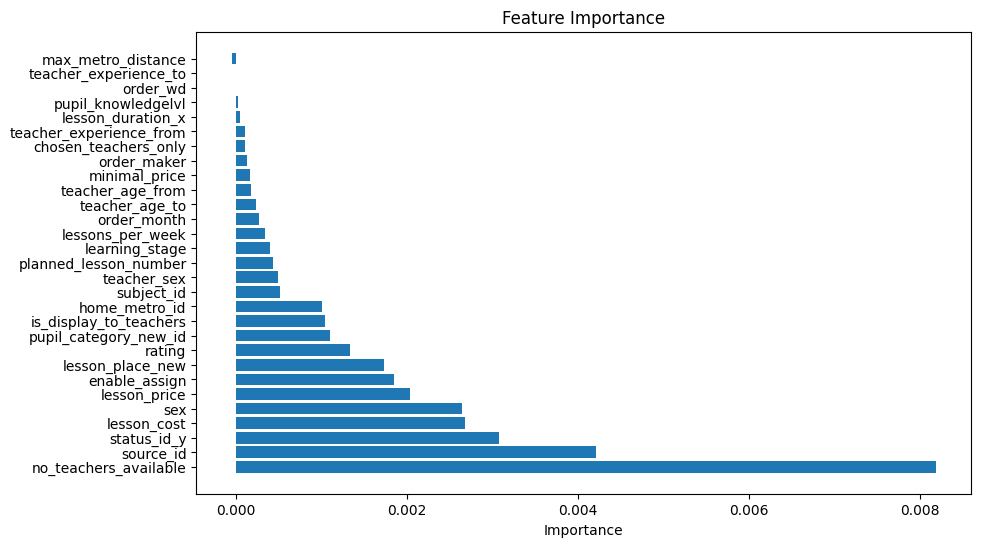

In [104]:
test_pool = Pool(X_test, y_test)
feature_importance = best_model.get_feature_importance(data=test_pool, type='LossFunctionChange')

feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Опыт преподавателя и день недели, в который была подана заявка имеют околонулевое влияние на обучение. Самое же большое влияние имеет имеет параметр отсутвия на заявку подходящих репетиторов. Мне кажется этот параметр достаточно показательным, поэтому я не стану его удалять из выборки.

Построим таблицу и оценим показатели целевых метрик

In [106]:
report = classification_report(y_test, predictions, target_names=['0', '1'], output_dict=True)
metrics_df = pd.DataFrame({
    'Label': ['0', '1'],
    'Precision': [report['0']['precision'], report['1']['precision']],
    'Recall': [report['0']['recall'], report['1']['recall']],
    'F1-Score': [report['0']['f1-score'], report['1']['f1-score']],
    'Support': [report['0']['support'], report['1']['support']]
})

display(metrics_df)

,Label,Precision,Recall,F1-Score,Support
0,0,0.831688,0.995045,0.906062,100918
1,1,0.502488,0.024247,0.046262,20827


Модель хорошо справляется с предсказанием объектов класса 0, но у нее есть проблемы с классом 1, что может требовать дополнительных улучшений, таких как балансировка классов или тюнинг параметров.

## Подведение итогов

Аналитическая работа включала в себя тщательную обработку и анализ предоставленных данных с целью подготовки их к обучению моделей машинного обучения. Процесс предварительной обработки данных включал в себя преобразование, очистку, и приведение к соответствующим типам данных. Также были созданы новые признаки для лучшего отражения структуры данных и лучшего понимания взаимосвязей между переменными.

В рамках анализа данных были выявлены ключевые характеристики, влияющие на целевую переменную. Это включало в себя выявление корреляций, аномалий и важности признаков. Были выявлены и исправлены ошибки в данных, такие как отрицательные значения и выбросы.

Далее, проведено обучение трех различных моделей машинного обучения: Случайного леса, LightGBM и CatBoost. После тщательного тюнинга гиперпараметров, CatBoost показал лучшие результаты, достигнув ROC-AUC равного 0.77. Это свидетельствует о хорошей способности модели к разделению классов и обобщению на новые данные.

Несмотря на общие удовлетворительные метрики, модель CatBoost все же выявила определенные трудности в предсказании оплаченных заявок. Дополнительный анализ ошибок модели указывает на возможные причины таких неточностей, возможно, вызванных несбалансированным распределением классов или наличием шума в данных.

Для улучшения предсказательной способности модели в отношении оплаченных заявок, рекомендуется:

1.   НБалансировка классов: Применение техник балансировки классов, таких как взвешивание классов или использование методов сэмплирования, может помочь модели лучше обучиться на классе с меньшим количеством экземпляров.
2.   Дополнительный тюнинг: Проведение дополнительного тюнинга гиперпараметров модели CatBoost для улучшения ее чувствительности к особенностям данных.
3.   Feature Engineering: Дальнейшее исследование и создание новых признаков для более глубокого понимания структуры данных и улучшения качества предсказаний.



Эти рекомендации могут способствовать повышению точности модели в отношении предсказания оплаченных заявок и улучшить ее обобщающую способность.